# Required libraries

In [2]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt, numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from matplotlib.colors import to_hex
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)

# LOADING DATA

In [4]:
# Load the Excel file
df = pd.read_excel("marketing_campaign.xlsx")
pd.set_option('display.max_columns', None)

df.head()


ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

# Data Cleaning & EDA

In [6]:
# Display basic info
print("Shape:", df.shape)

Shape: (2240, 29)


In [7]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [8]:
# Summary statistics
df.describe(include='all')


ID   Year_Birth   Education Marital_Status         Income  \
count    2240.000000  2240.000000        2240           2240    2216.000000   
unique           NaN          NaN           5              8            NaN   
top              NaN          NaN  Graduation        Married            NaN   
freq             NaN          NaN        1127            864            NaN   
mean     5592.159821  1968.805804         NaN            NaN   52247.251354   
min         0.000000  1893.000000         NaN            NaN    1730.000000   
25%      2828.250000  1959.000000         NaN            NaN   35303.000000   
50%      5458.500000  1970.000000         NaN            NaN   51381.500000   
75%      8427.750000  1977.000000         NaN            NaN   68522.000000   
max     11191.000000  1996.000000         NaN            NaN  666666.000000   
std      3246.662198    11.984069         NaN            NaN   25173.076661   

            Kidhome     Teenhome                    Dt_Customer      Recency  \
count   2240.000000  2240.000000                           2240  2240.000000   
unique          NaN          NaN                            NaN          NaN   
top             NaN          NaN                            NaN          NaN   
freq            NaN          NaN                            NaN          NaN   
mean       0.444196     0.506250  2013-07-10 10:01:42.857142784    49.109375   
min        0.000000     0.000000            2012-07-30 00:00:00     0.000000   
25%        0.000000     0.000000            2013-01-16 00:00:00    24.000000   
50%        0.000000     0.000000            2013-07-08 12:00:00    49.000000   
75%        1.000000     1.000000            2013-12-30 06:00:00    74.000000   
max        2.000000     2.000000            2014-06-29 00:00:00    99.000000   
std        0.538398     0.544538                            NaN    28.962453   

           MntWines    MntFruits  MntMeatProducts  MntFishProducts  \
count   2240.000000  2240.000000      2240.000000      2240.000000   
unique          NaN          NaN              NaN              NaN   
top             NaN          NaN              NaN              NaN   
freq            NaN          NaN              NaN              NaN   
mean     303.935714    26.302232       166.950000        37.525446   
min        0.000000     0.000000         0.000000         0.000000   
25%       23.750000     1.000000        16.000000         3.000000   
50%      173.500000     8.000000        67.000000        12.000000   
75%      504.250000    33.000000       232.000000        50.000000   
max     1493.000000   199.000000      1725.000000       259.000000   
std      336.597393    39.773434       225.715373        54.628979   

        MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
count        2240.000000   2240.000000        2240.000000      2240.000000   
unique               NaN           NaN                NaN              NaN   
top                  NaN           NaN                NaN              NaN   
freq                 NaN           NaN                NaN              NaN   
mean           27.062946     44.021875           2.325000         4.084821   
min             0.000000      0.000000           0.000000         0.000000   
25%             1.000000      9.000000           1.000000         2.000000   
50%             8.000000     24.000000           2.000000         4.000000   
75%            33.000000     56.000000           3.000000         6.000000   
max           263.000000    362.000000          15.000000        27.000000   
std            41.280498     52.167439           1.932238         2.778714   

        NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
count           2240.000000        2240.000000        2240.000000   
unique                  NaN                NaN                NaN   
top                     NaN                NaN                NaN   
freq                    NaN                NaN        

In [9]:
# Check data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [10]:
# Count missing values in each column
df.isnull().sum()



ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [11]:
# filling missing value with mean value
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [12]:
#To remove the NA values
df = df.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df))

The total number of data-points after removing the rows with missing values are: 2240


In [13]:
# Select categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

# Display value counts
for col in cat_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())



Value counts for Education:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Value counts for Marital_Status:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


In [14]:
# Select numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns


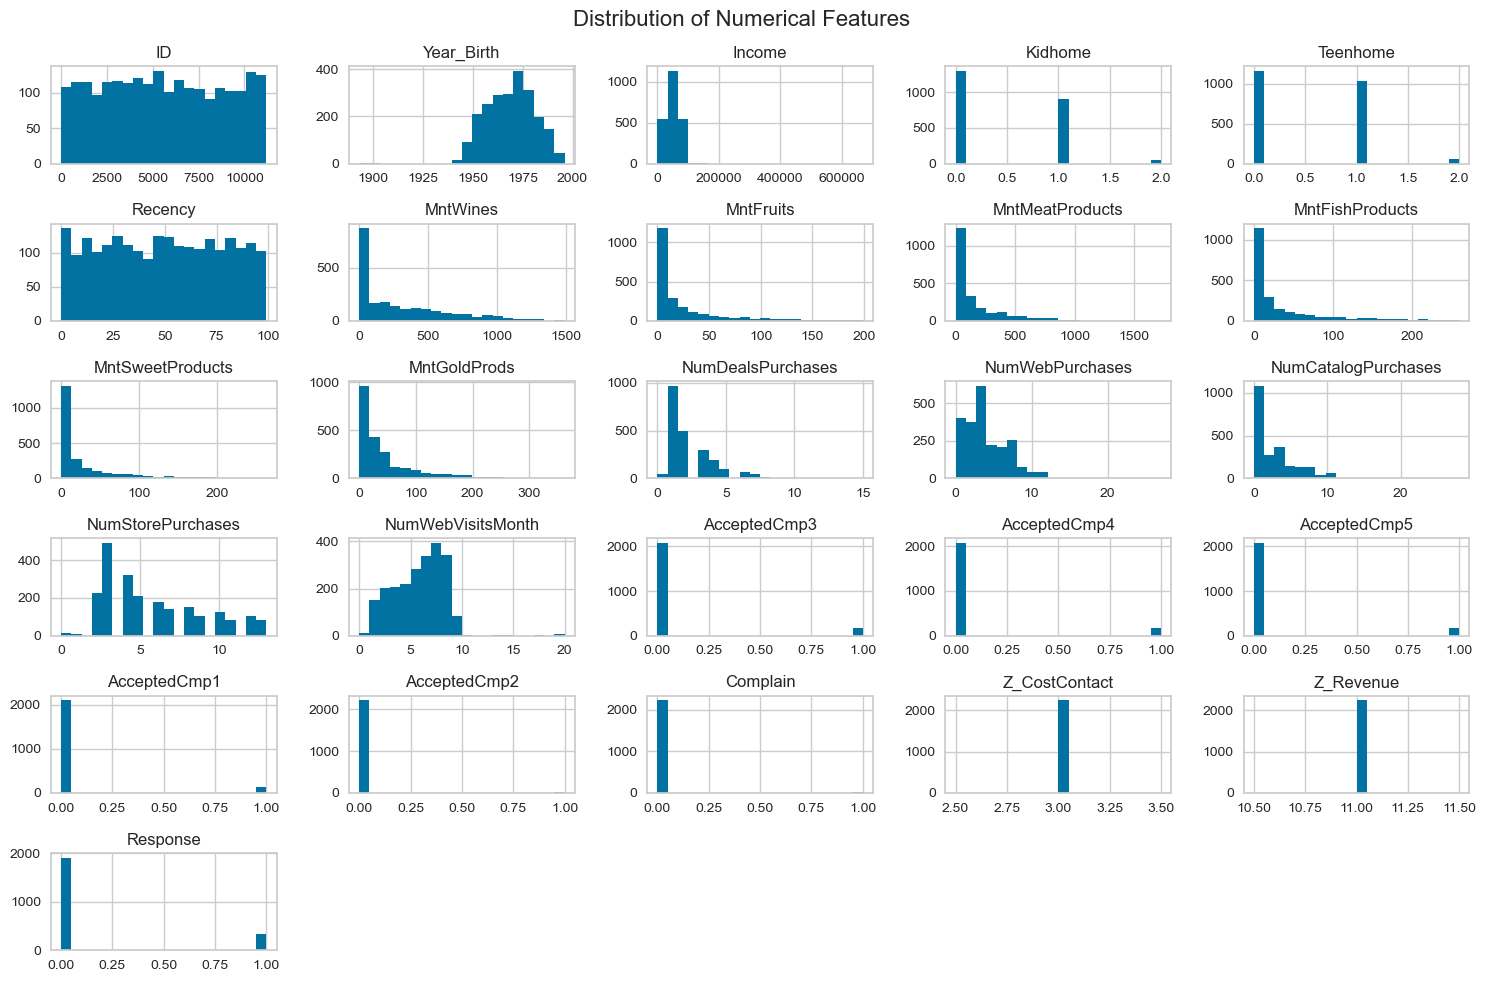

In [15]:

# Histograms for all numeric columns
df[num_cols].hist(figsize=(15, 10), bins=20)
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


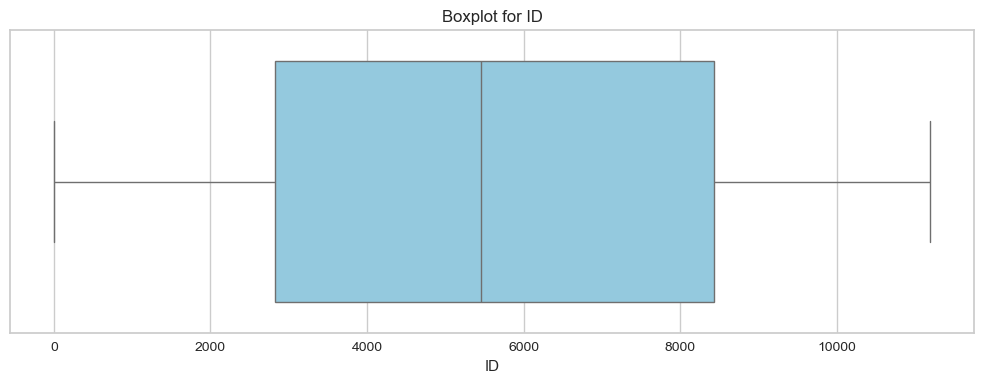

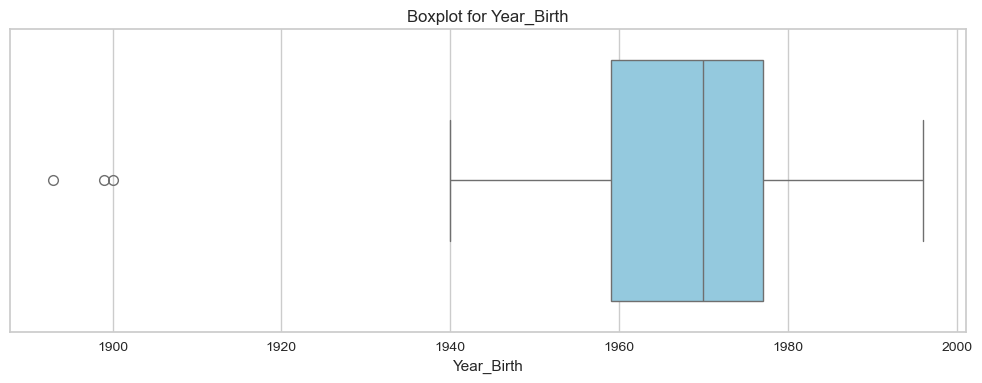

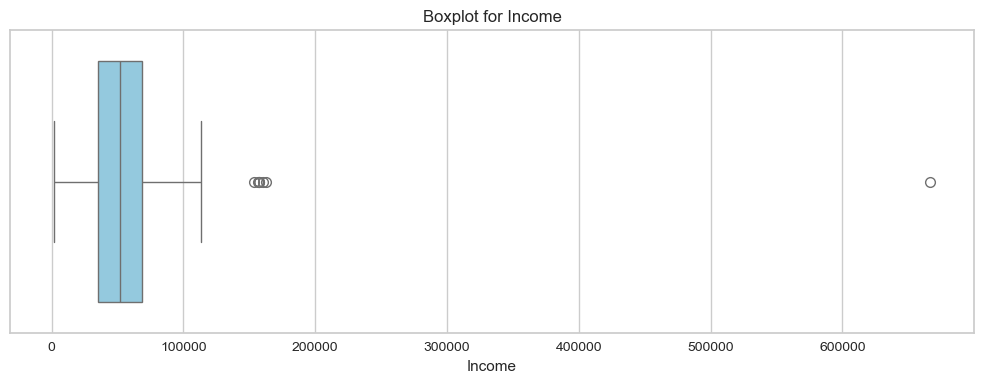

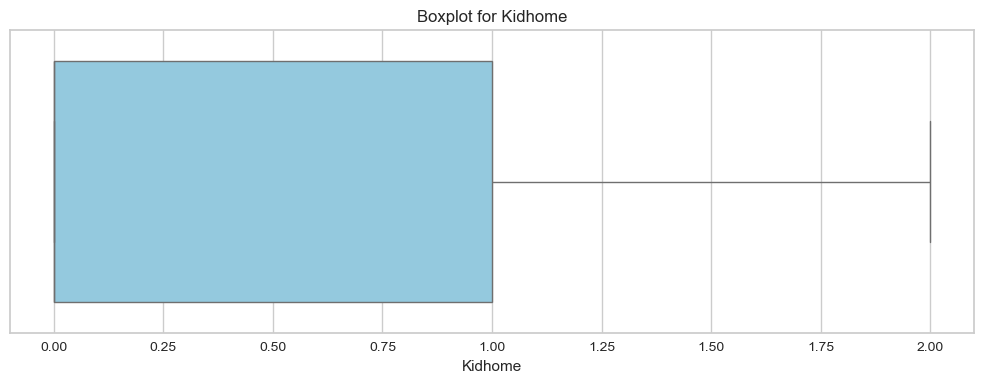

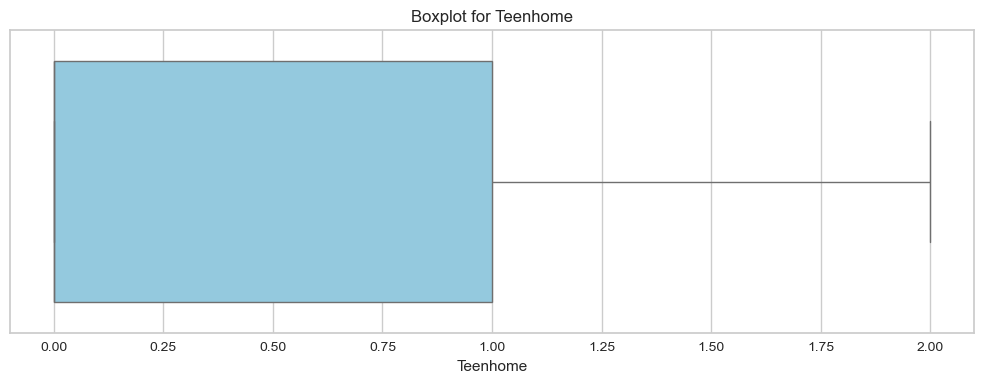

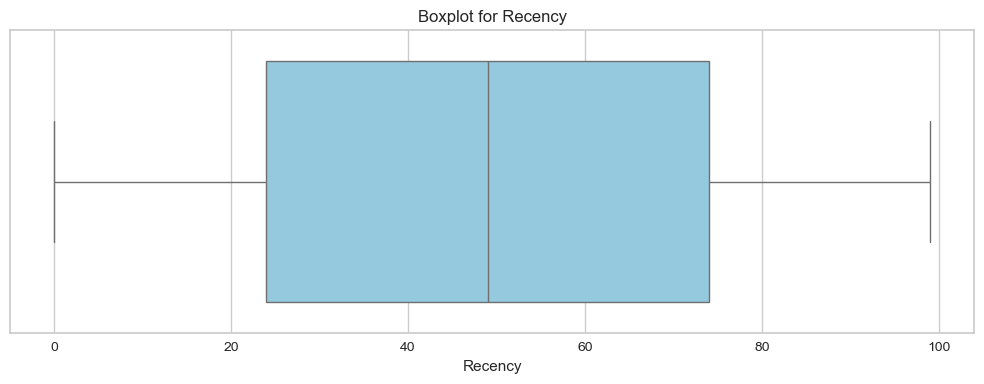

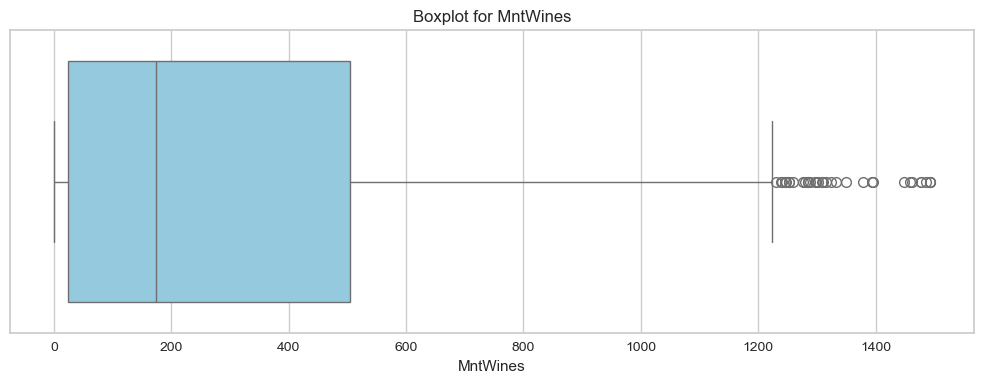

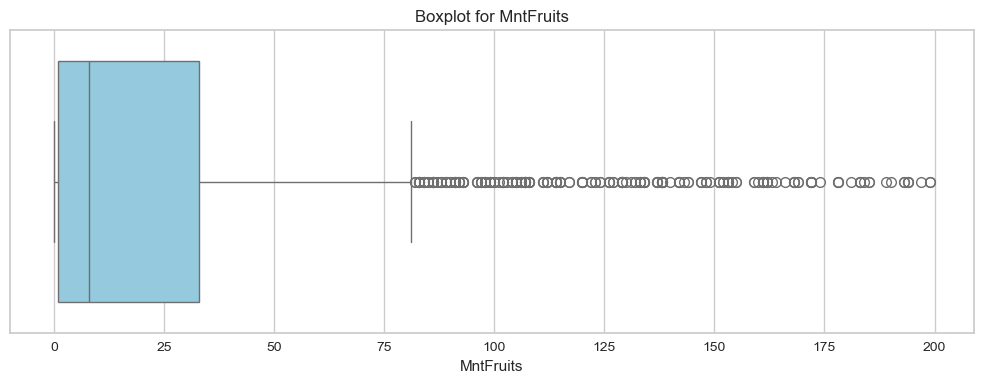

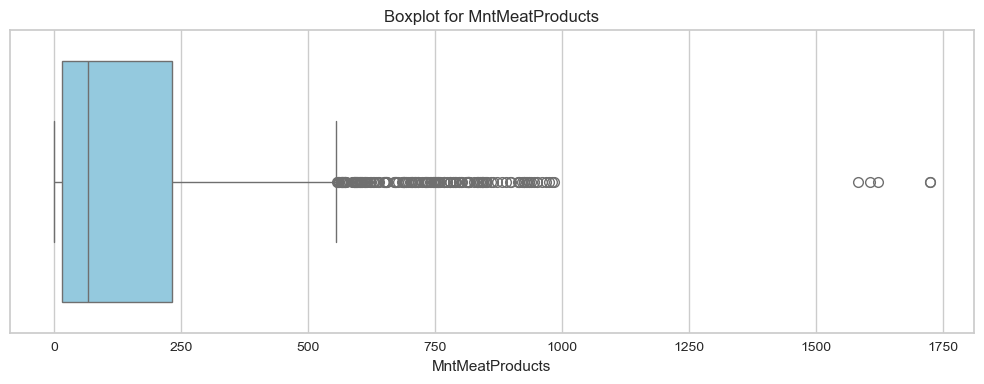

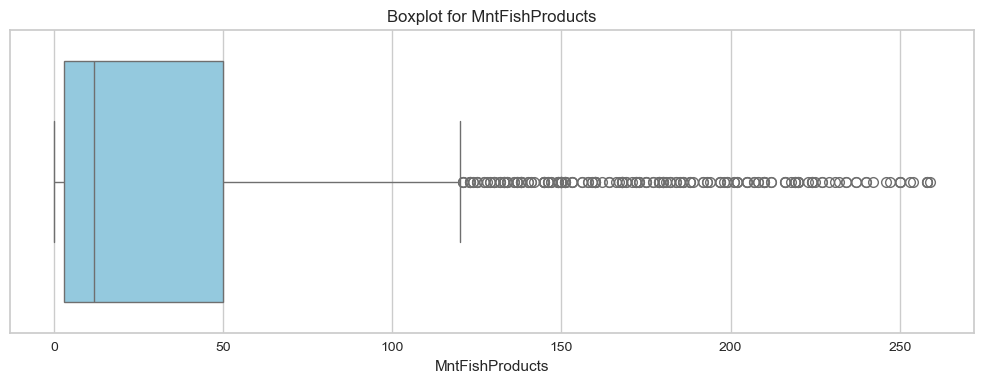

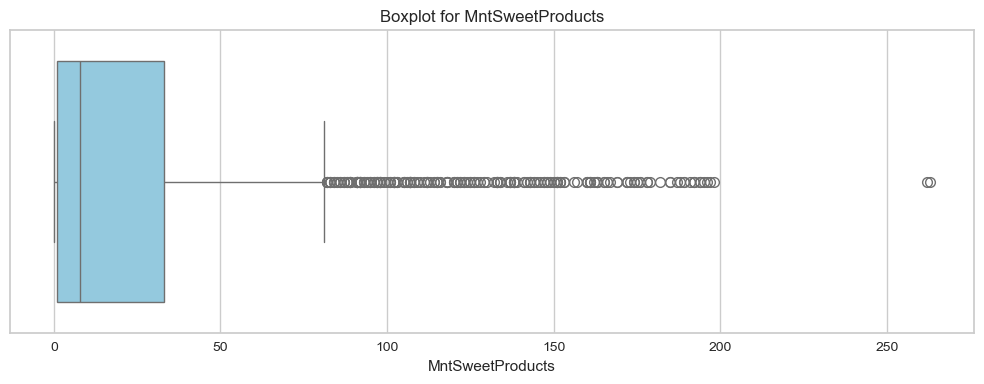

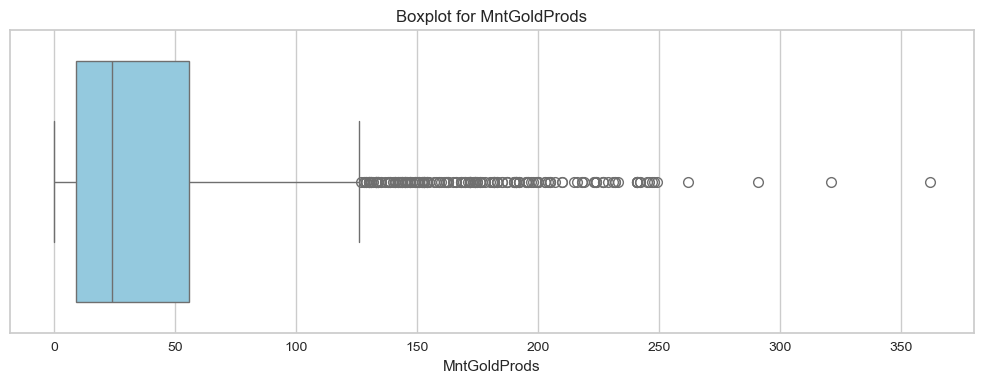

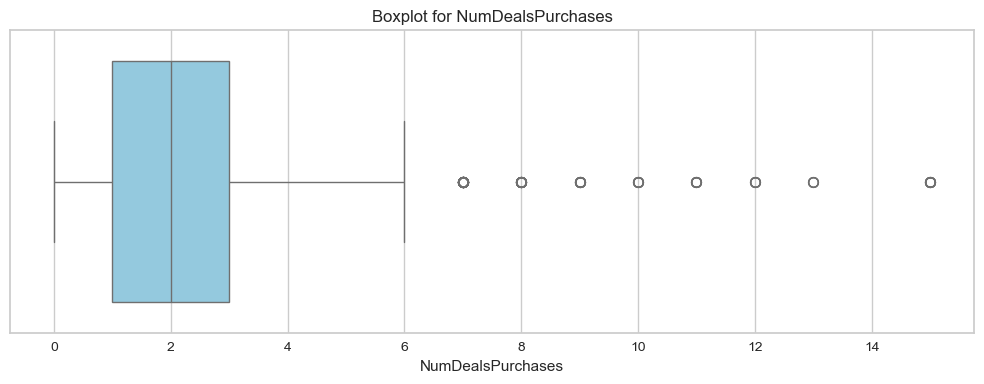

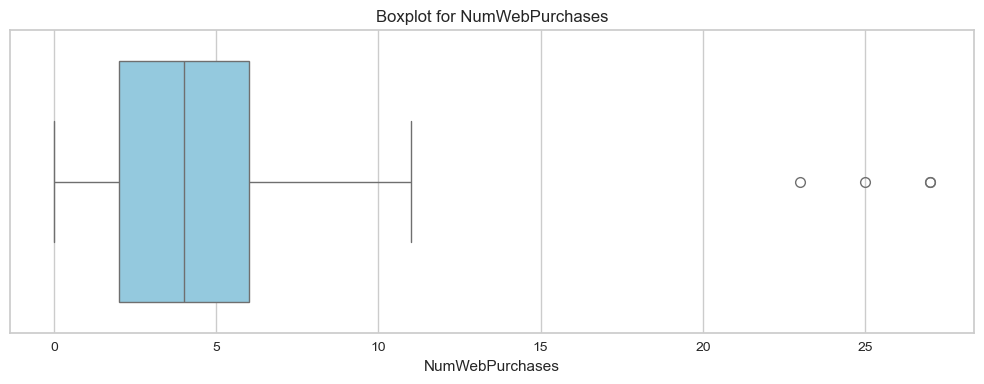

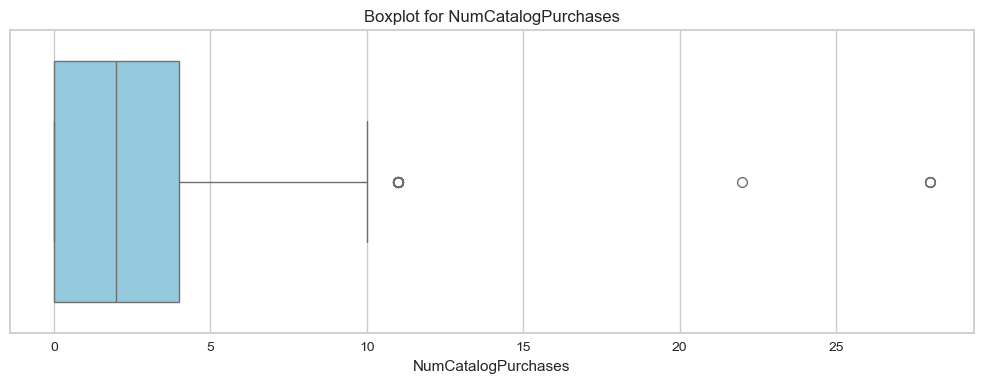

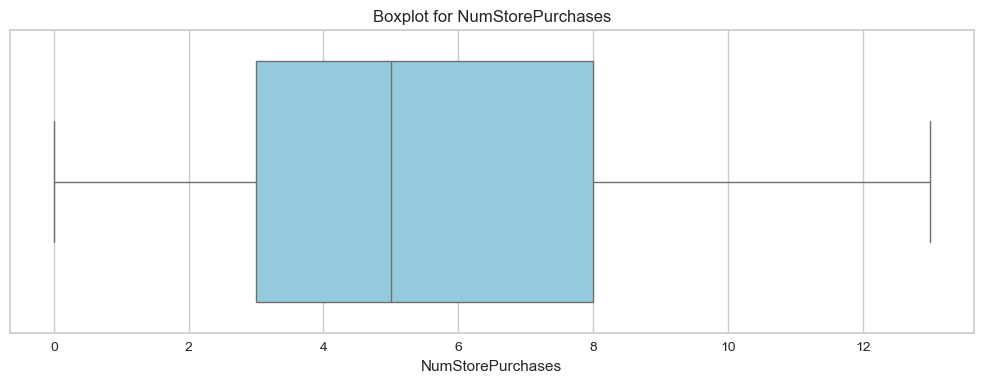

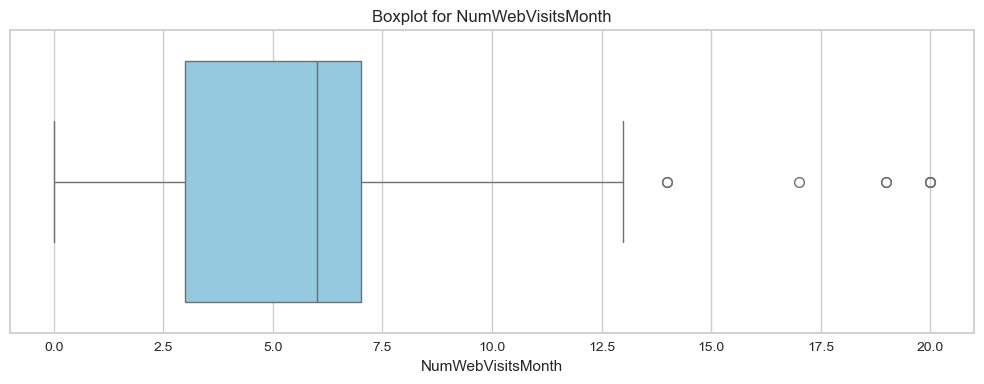

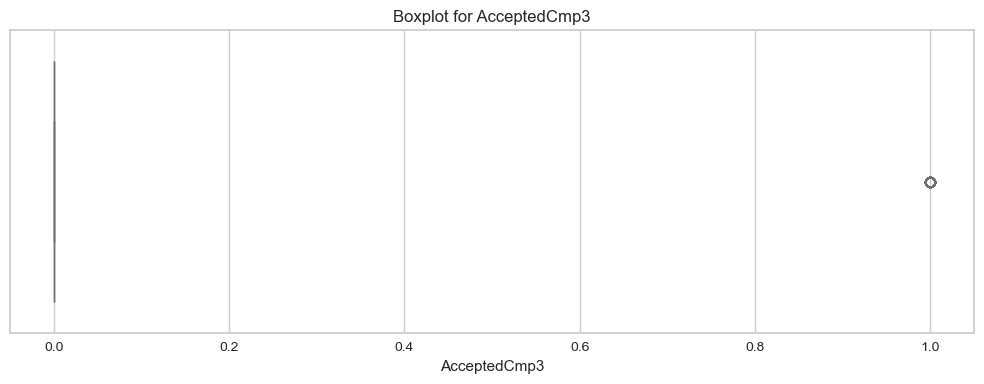

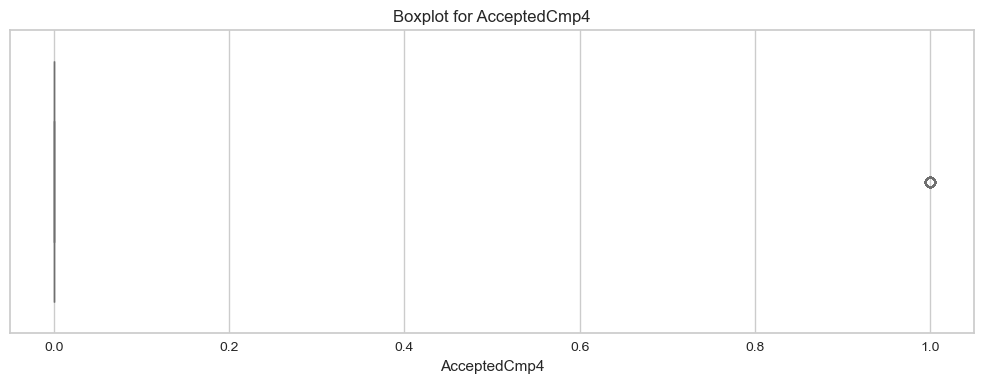

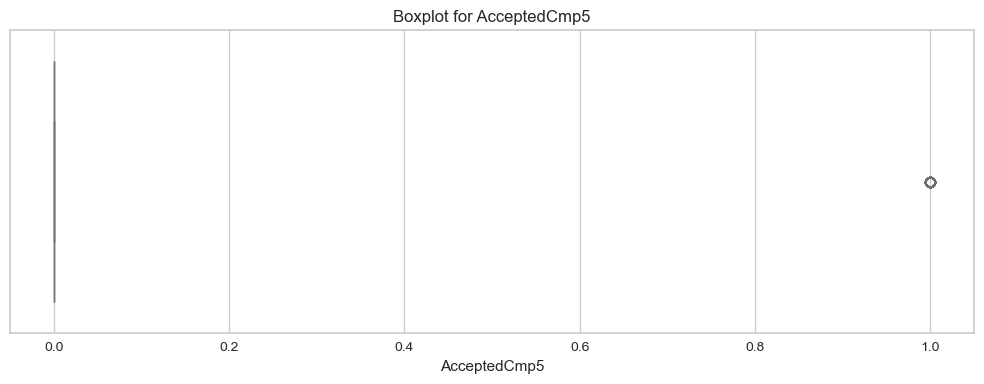

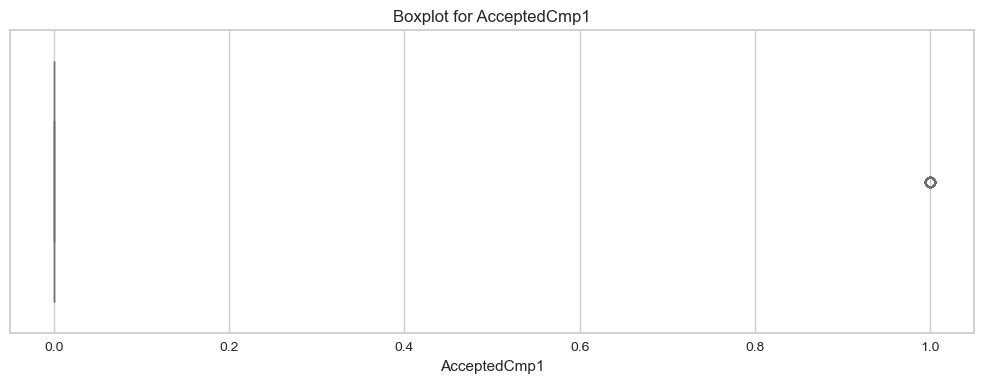

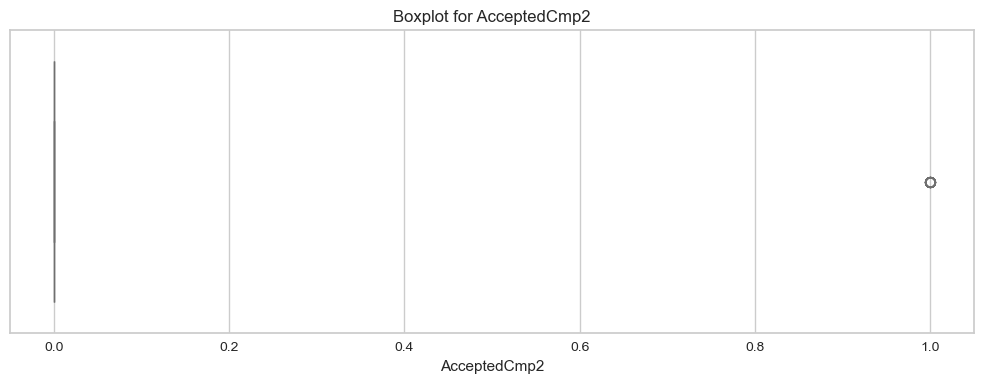

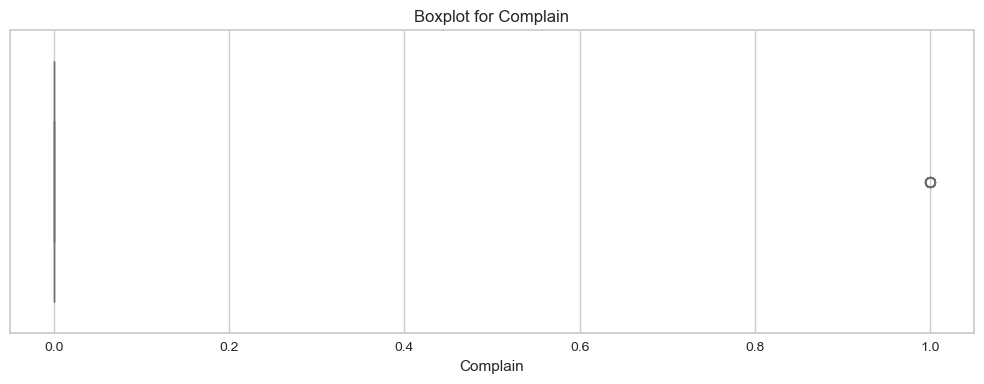

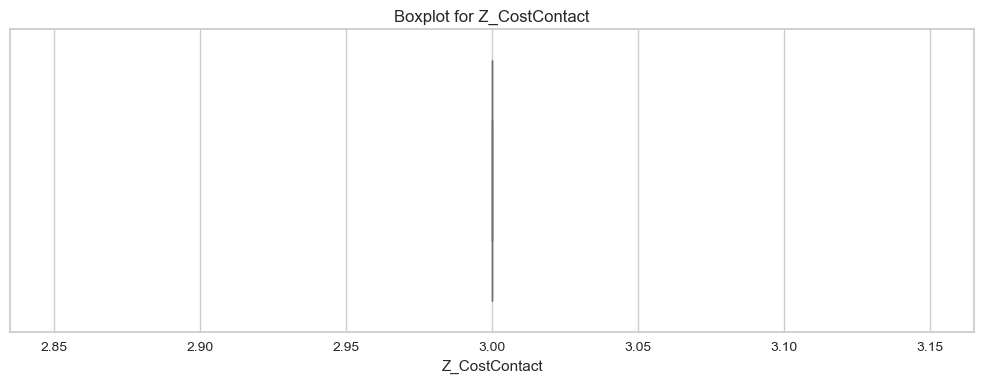

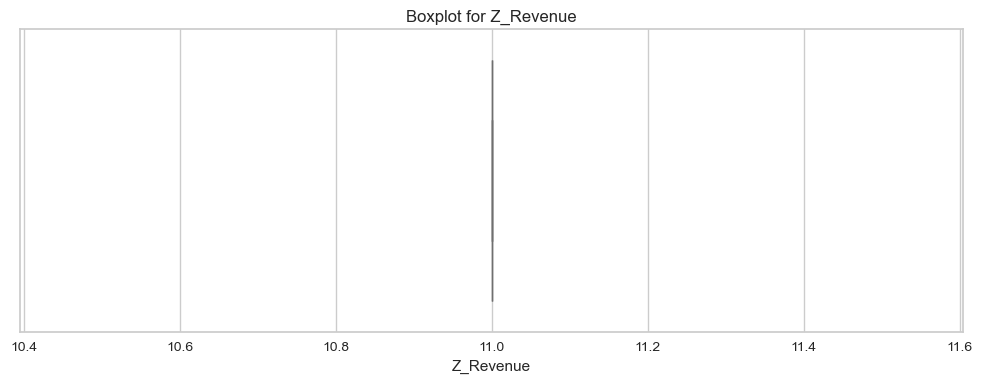

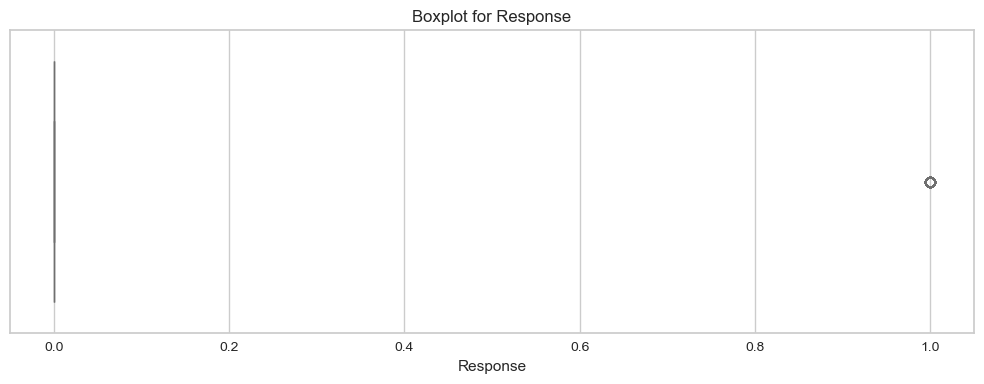

In [16]:
# Plot boxplots for each numerical column
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f"Boxplot for {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()
    

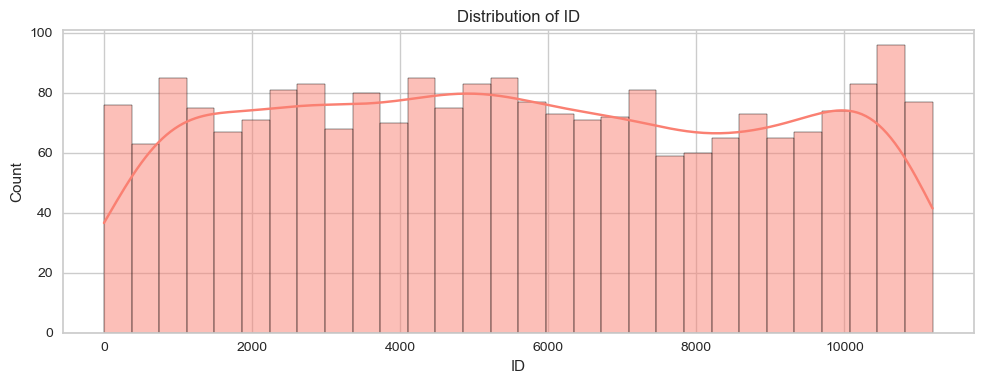

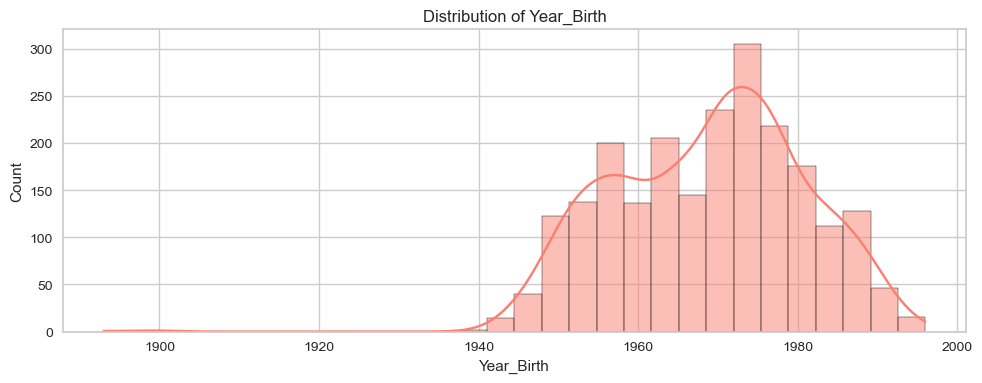

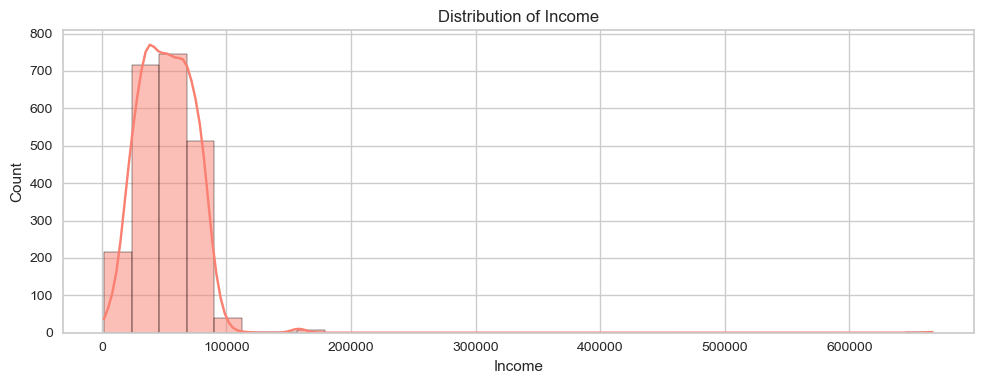

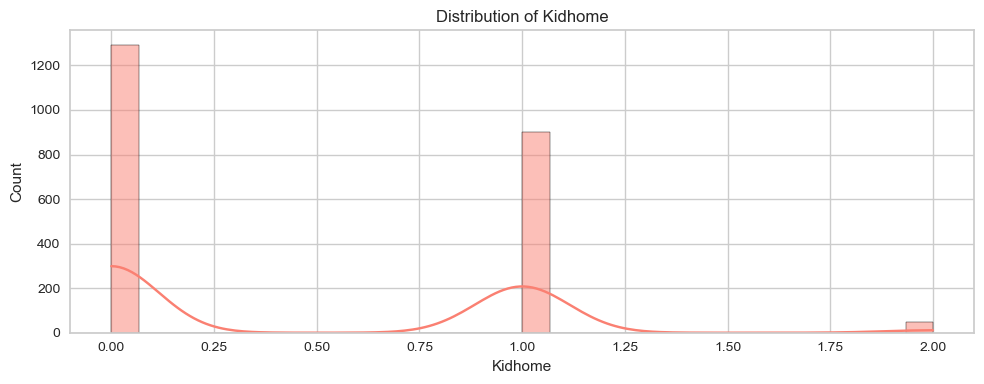

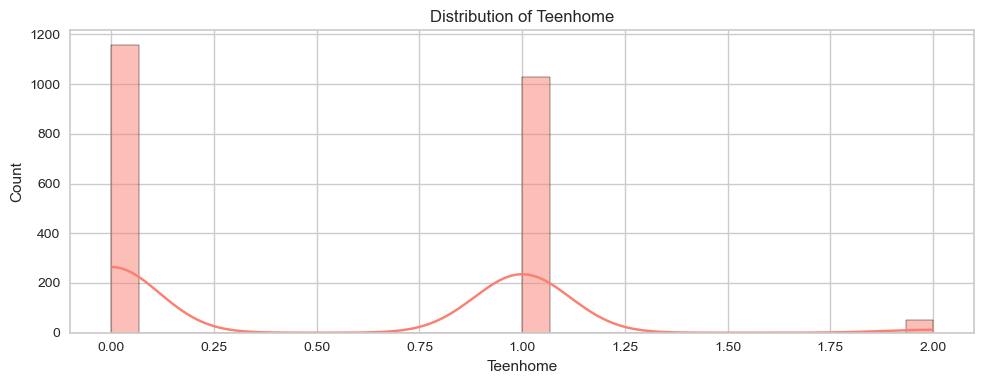

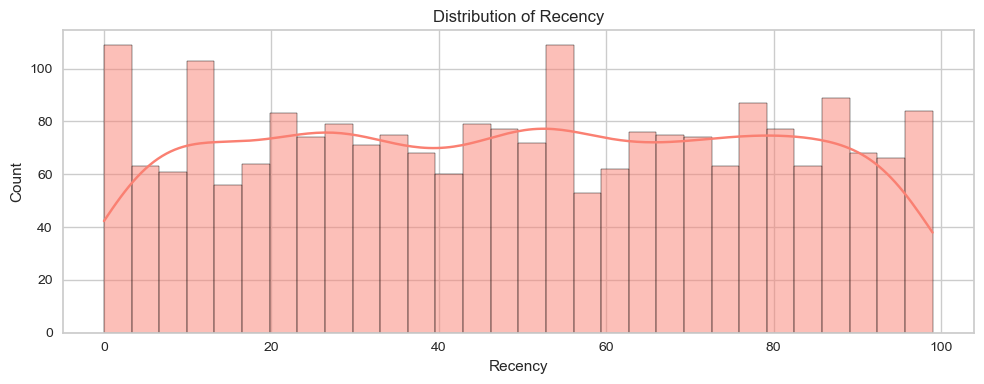

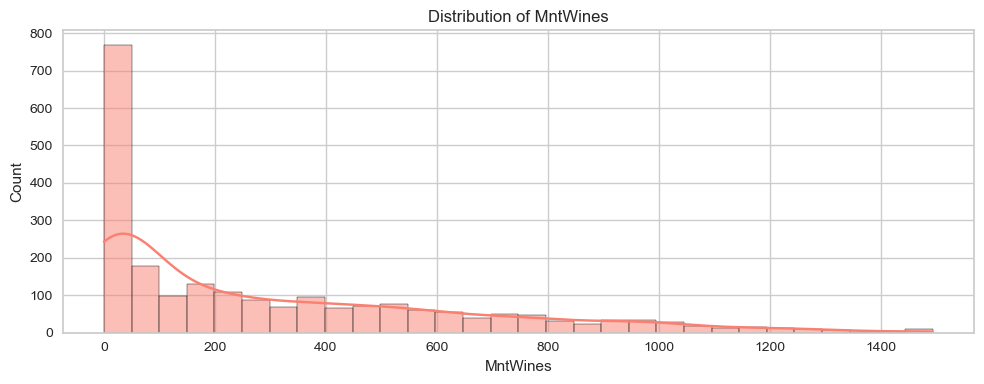

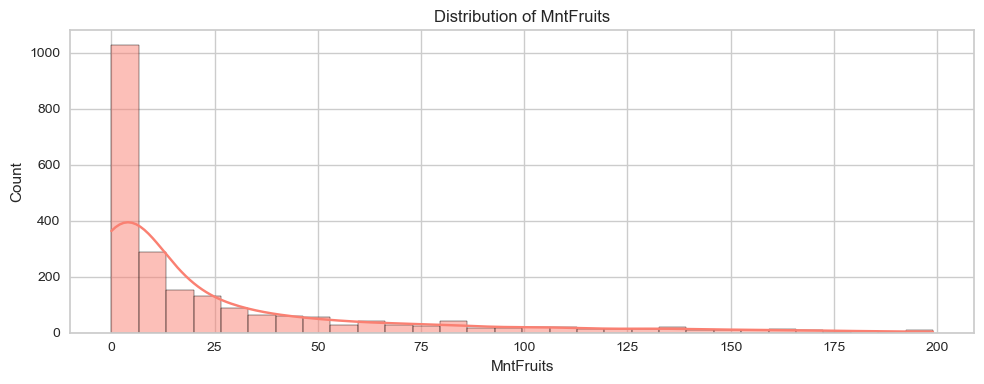

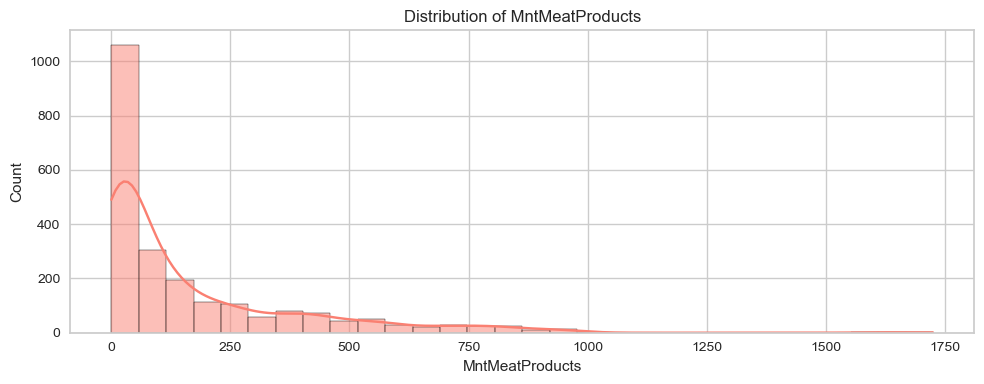

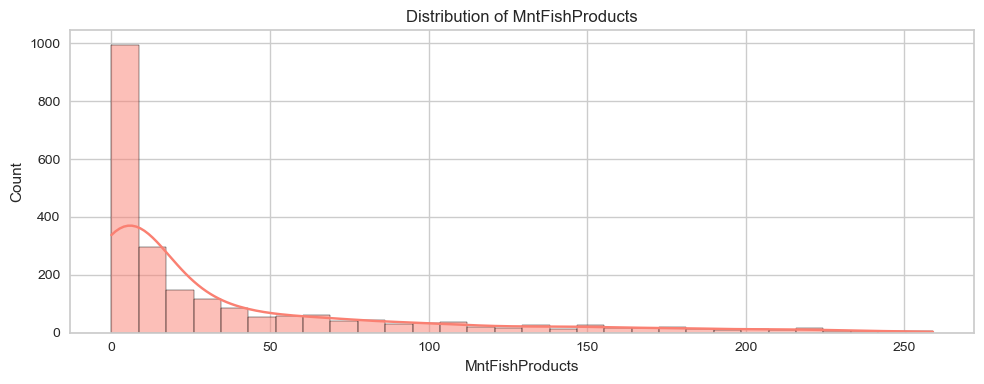

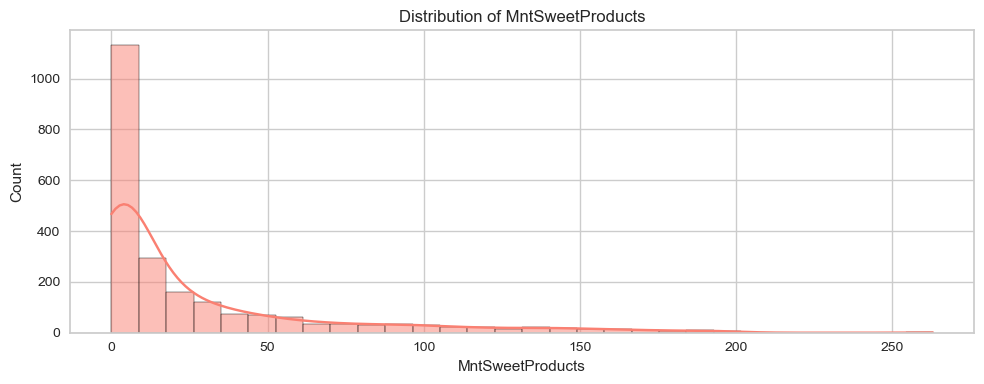

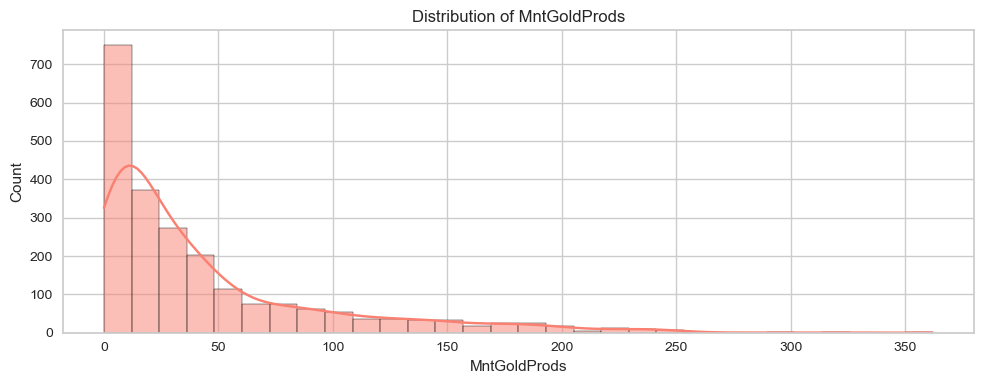

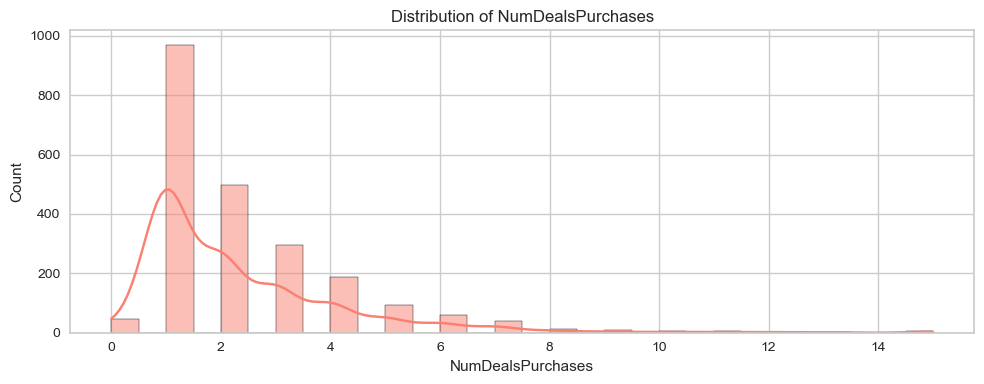

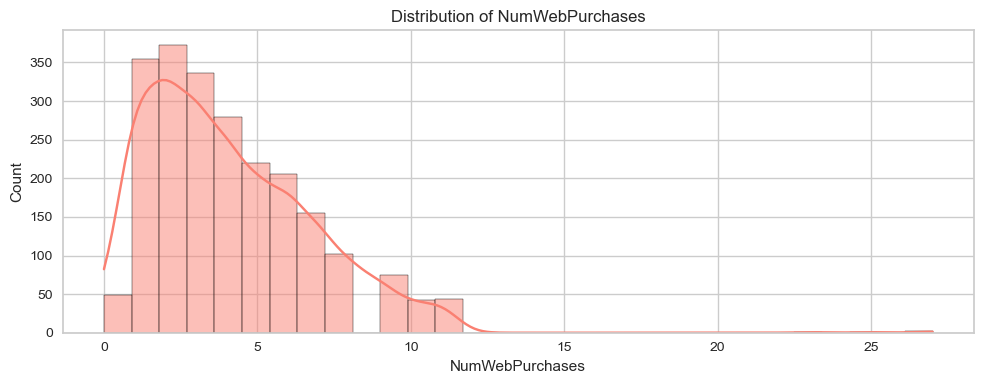

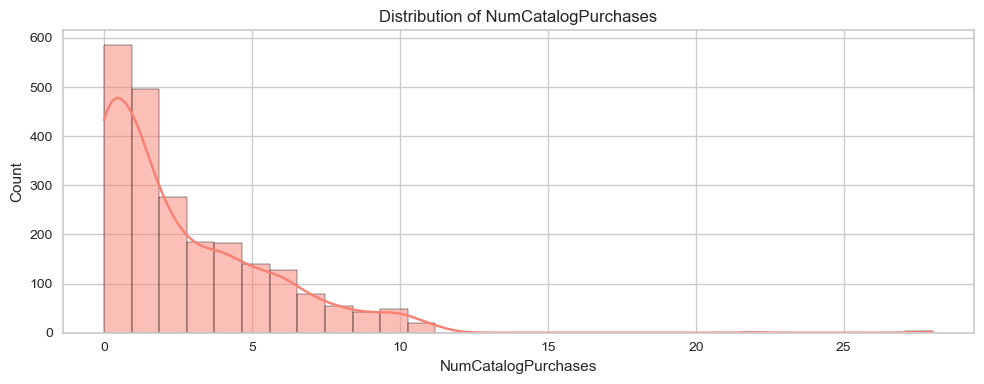

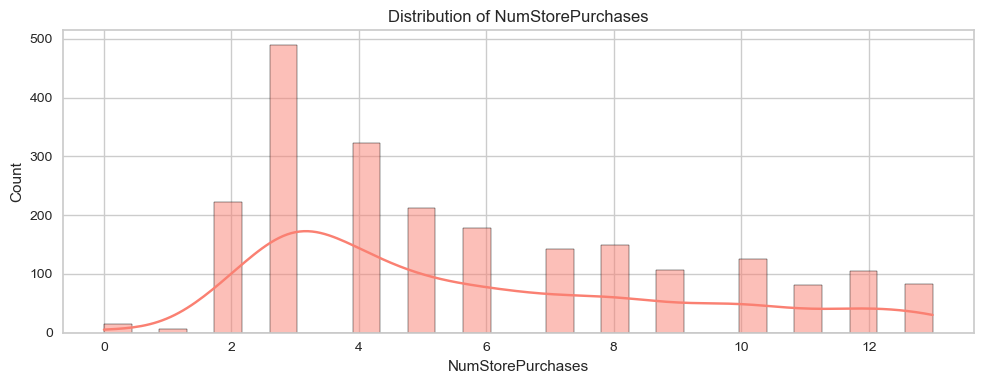

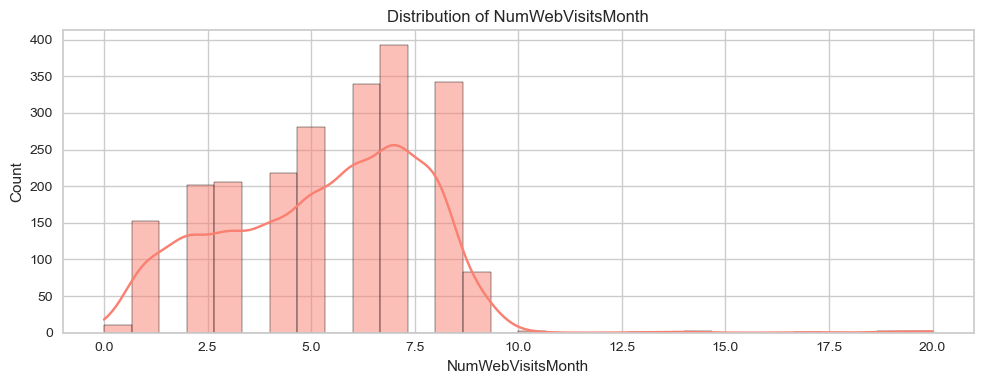

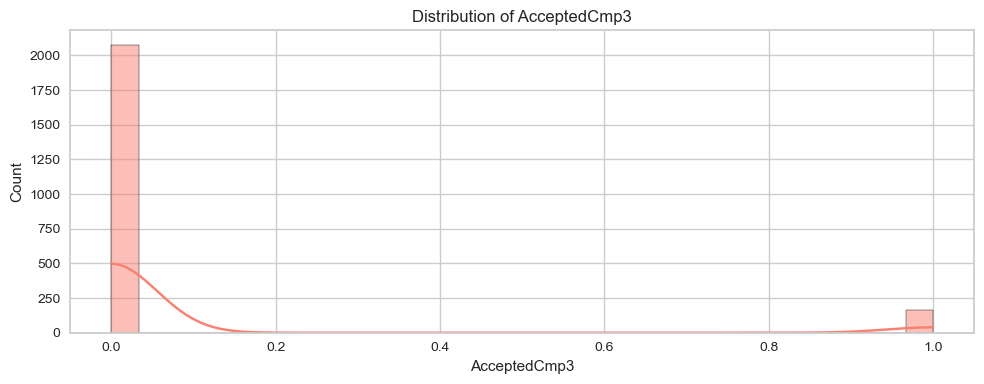

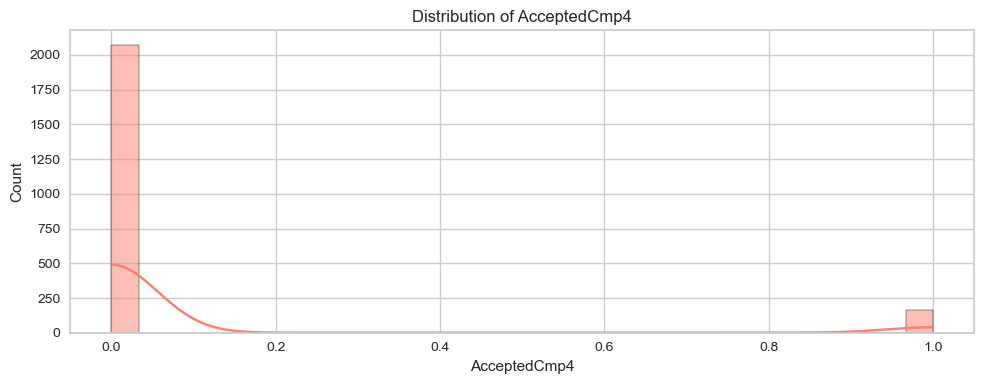

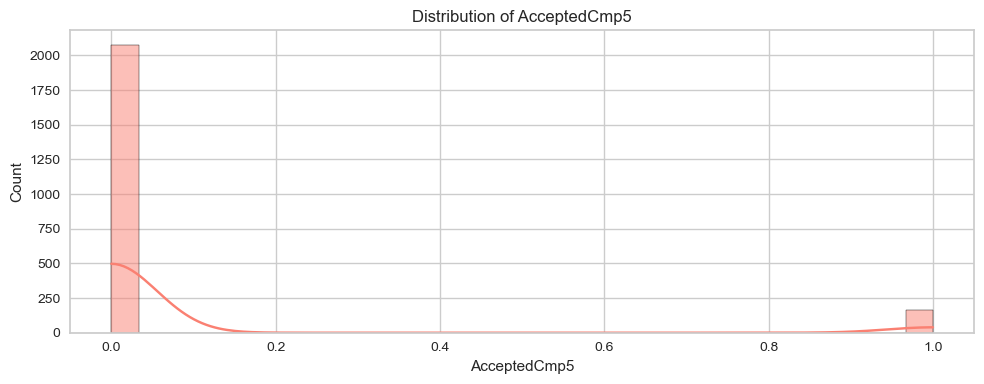

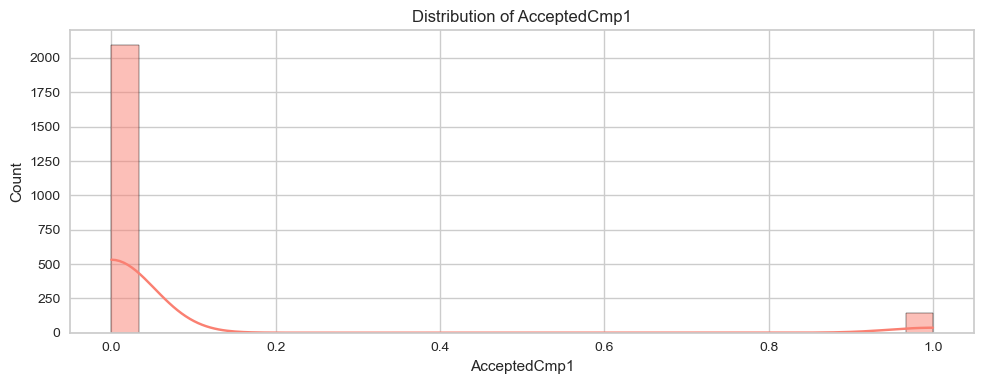

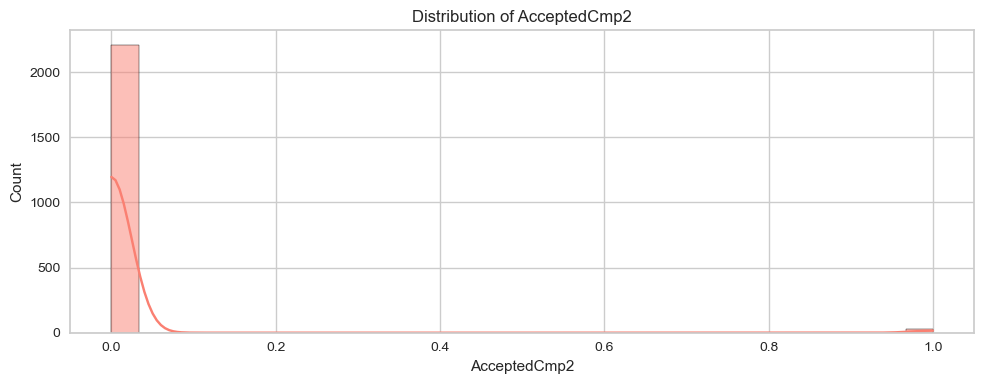

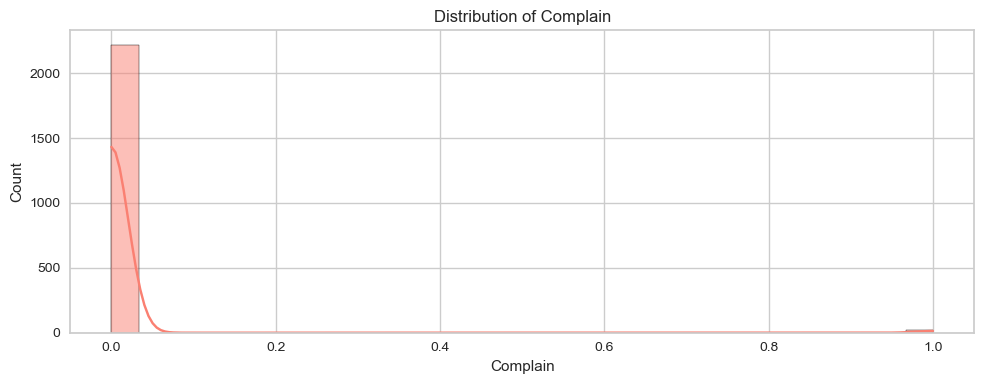

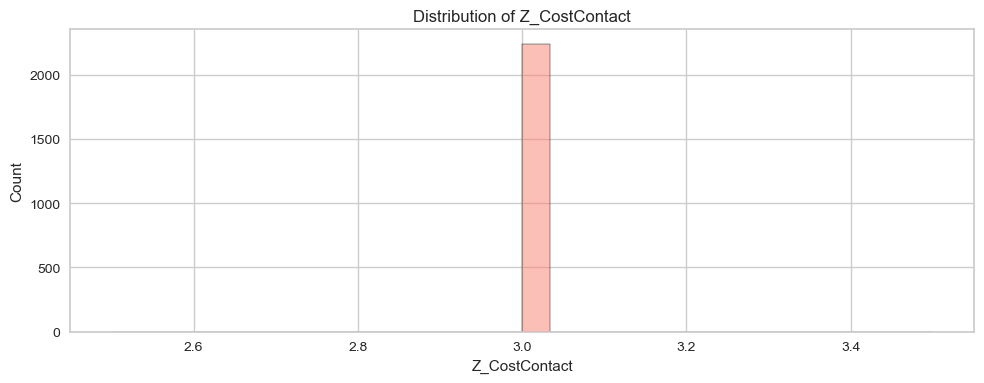

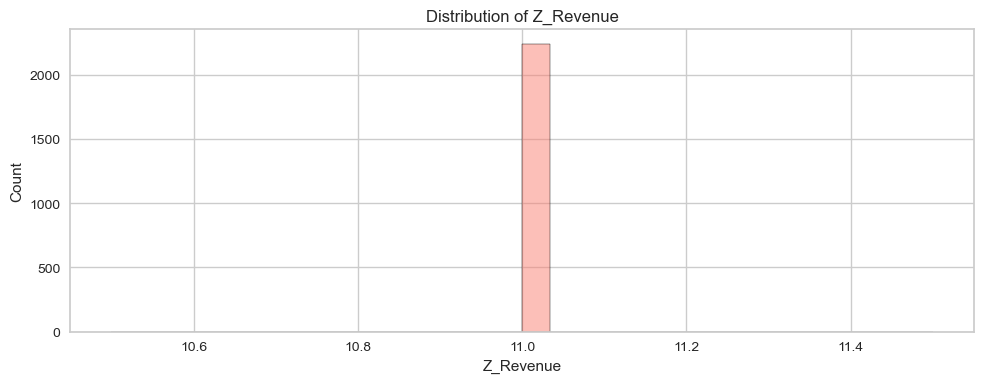

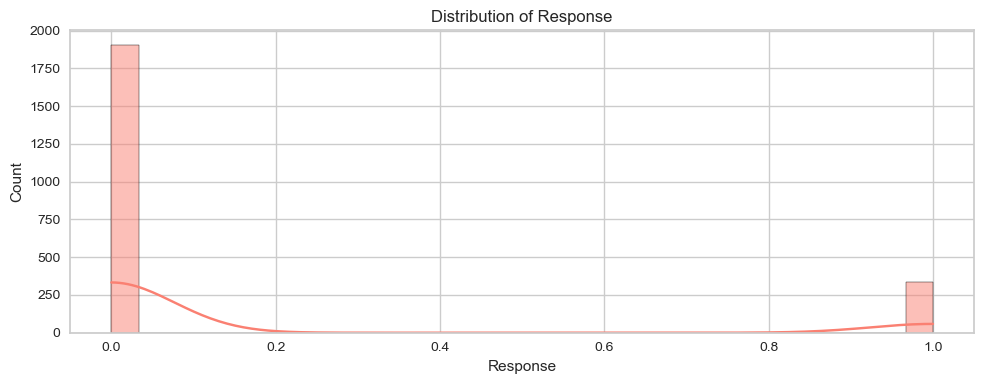

In [17]:
# Distribution plots to visualize skewness and spread
for col in num_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[col], kde=True, bins=30, color='salmon')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [18]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [19]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
df["Customer_For"] = days
df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce")

In [20]:
#Feature Engineering
#Age of customer today 
df["Age"] = 2025-df["Year_Birth"]
df["Age"].head()

0    68
1    71
2    60
3    41
4    44
Name: Age, dtype: int64

In [21]:
#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]
df["Spent"].head()

0    1617
1      27
2     776
3      53
4     422
Name: Spent, dtype: int64

In [22]:
#Deriving living situation by marital status"Alone"
df["Living_status"]=df["Marital_Status"].replace({"Married":"Pair", "Together":"Pair", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})
df["Living_status"].head()

0    Alone
1    Alone
2     Pair
3     Pair
4     Pair
Name: Living_status, dtype: object

In [23]:
#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]
df["Children"].head()

0    0
1    2
2    0
3    1
4    1
Name: Children, dtype: int64

In [24]:
#Feature for total members in the householde
df["Family_Size"] = df["Living_status"].replace({"Alone": 1, "Pair":2})+ df["Children"]
df["Family_Size"].head()

0    1
1    3
2    2
3    3
4    3
Name: Family_Size, dtype: int64

In [25]:
#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)
df["Is_Parent"].head()

0    0
1    1
2    0
3    1
4    1
Name: Is_Parent, dtype: int32

In [26]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"UG","2n Cycle":"UG", "Graduation":"Grad", "Master":"PG", "PhD":"PG"})
df["Education"].head()

0    Grad
1    Grad
2    Grad
3    Grad
4      PG
Name: Education, dtype: object

In [27]:
#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For', 'Age', 'Spent', 'Living_status', 'Children',
       'Family_Size', 'Is_Parent'],
      dtype='object')

In [28]:
#Dropping some of the redundant features
to_drop = ['Kidhome','Teenhome',"Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [29]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2236


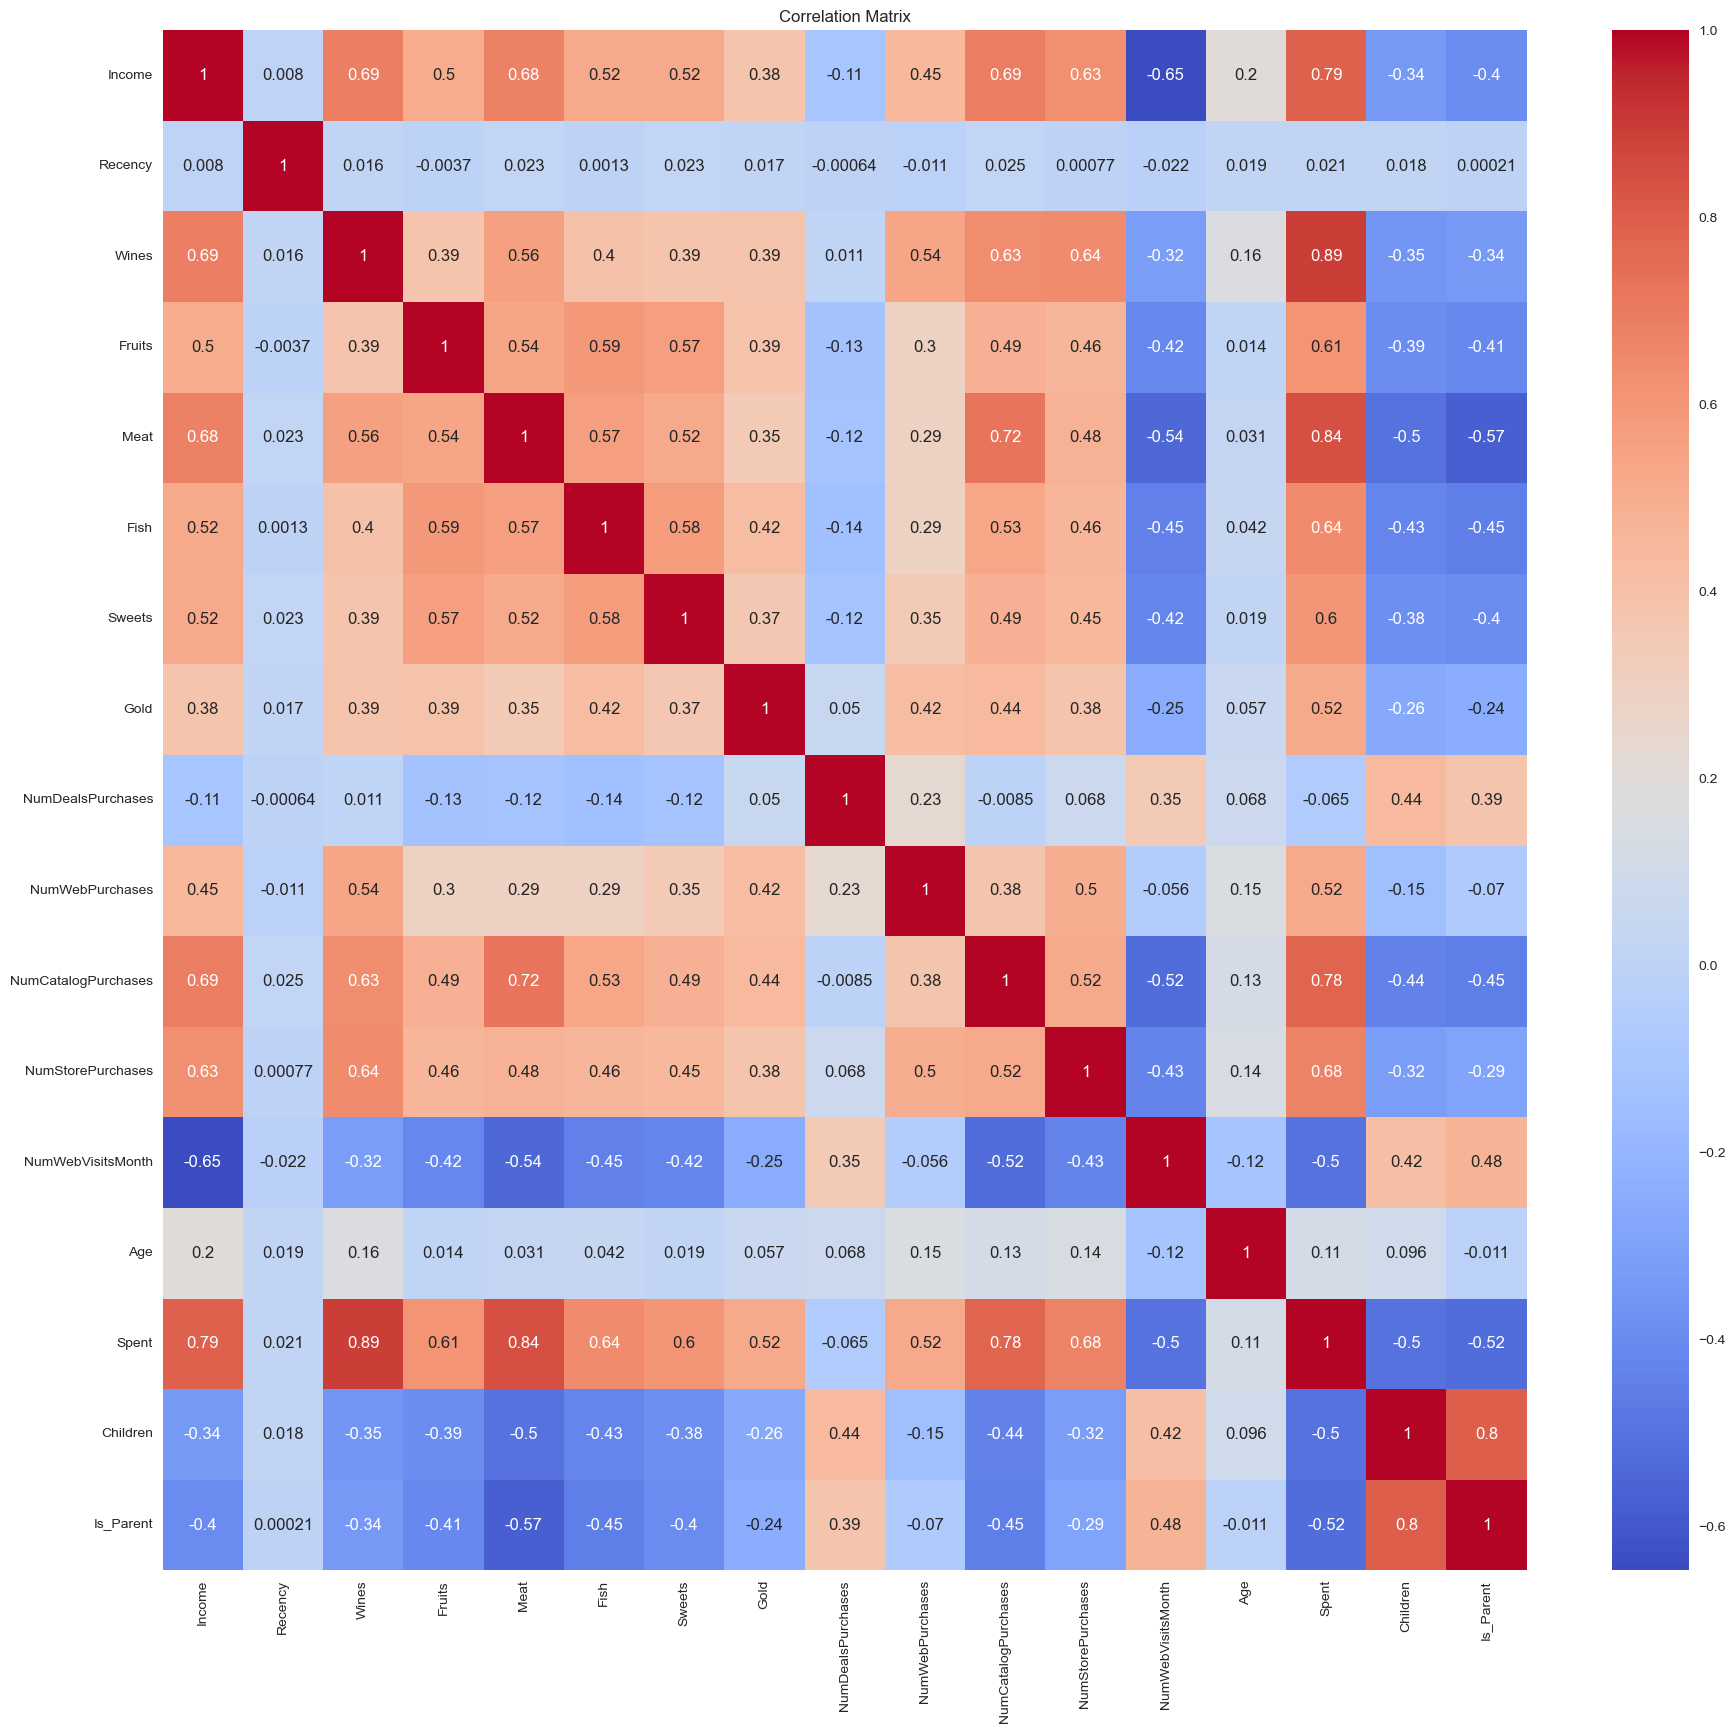

In [30]:
#correlation matrix
columns=[ 'Income', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'Age', 'Spent', 'Children', 'Is_Parent']
corrmat= df[columns].corr()
plt.figure(figsize=(22,20))  
sns.heatmap(corrmat,annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

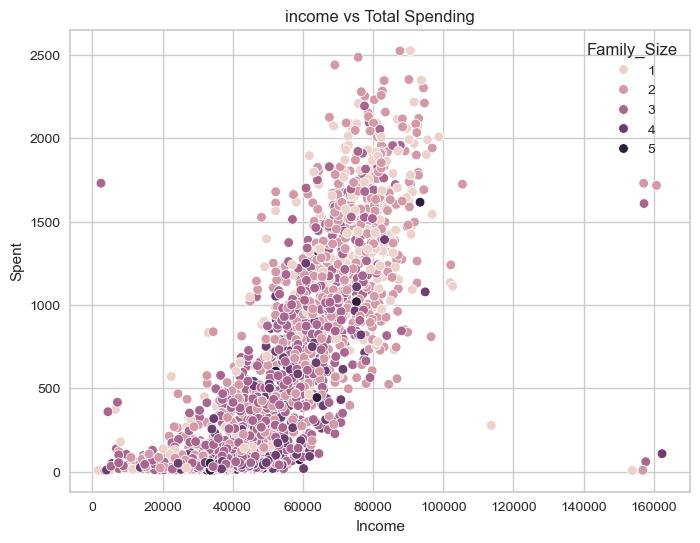

In [31]:
# Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Income', y="Spent", hue='Family_Size')
plt.title("income vs Total Spending")
plt.show()


In [32]:
df.head()

Education   Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0      Grad  58138.0       58    635      88   546   172      88    88   
1      Grad  46344.0       38     11       1     6     2       1     6   
2      Grad  71613.0       26    426      49   127   111      21    42   
3      Grad  26646.0       26     11       4    20    10       3     5   
4        PG  58293.0       94    173      43   118    46      27    15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  3                8                   10                  4   
1                  2                1                    1                  2   
2                  1                8                    2                 10   
3                  2                2                    0                  4   
4                  5                5                    3                  6   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  7             0             0             0             0   
1                  5             0             0             0             0   
2                  4             0             0             0             0   
3                  6             0             0             0             0   
4                  5             0             0             0             0   

   AcceptedCmp2  Complain  Response       Customer_For  Age  Spent  \
0             0         0         1  57283200000000000   68   1617   
1             0         0         0   9763200000000000   71     27   
2             0         0         0  26956800000000000   60    776   
3             0         0         0  12009600000000000   41     53   
4             0         0         0  13910400000000000   44    422   

  Living_status  Children  Family_Size  Is_Parent  
0         Alone         0            1          0  
1         Alone         2            3          1  
2          Pair         0            2          0  
3          Pair         1            3          1  
4          Pair         1            3          1

# DATA PREPROCESSING

In [34]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_status']


In [35]:
#Label Encoding the object dtypes.
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [36]:
df

Education   Income  Recency  Wines  Fruits  Meat  Fish  Sweets  Gold  \
0             0  58138.0       58    635      88   546   172      88    88   
1             0  46344.0       38     11       1     6     2       1     6   
2             0  71613.0       26    426      49   127   111      21    42   
3             0  26646.0       26     11       4    20    10       3     5   
4             1  58293.0       94    173      43   118    46      27    15   
...         ...      ...      ...    ...     ...   ...   ...     ...   ...   
2235          0  61223.0       46    709      43   182    42     118   247   
2236          1  64014.0       56    406       0    30     0       0     8   
2237          0  56981.0       91    908      48   217    32      12    24   
2238          1  69245.0        8    428      30   214    80      30    61   
2239          1  52869.0       40     84       3    61     2       1    21   

      NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0                     3                8                   10   
1                     2                1                    1   
2                     1                8                    2   
3                     2                2                    0   
4                     5                5                    3   
...                 ...              ...                  ...   
2235                  2                9                    3   
2236                  7                8                    2   
2237                  1                2                    3   
2238                  2                6                    5   
2239                  3                3                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                     4                  7             0             0   
1                     2                  5             0             0   
2                    10                  4             0             0   
3                     4                  6             0             0   
4                     6                  5             0             0   
...                 ...                ...           ...           ...   
2235                  4                  5             0             0   
2236                  5                  7             0             0   
2237                 13                  6             0             1   
2238                 10                  3             0             0   
2239                  4                  7             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0                0             0             0         0         1   
1                0             0             0         0         0   
2                0             0             0         0         0   
3                0             0             0         0         0   
4                0             0             0         0         0   
...            ...           ...           ...       ...       ...   
2235             0             0             0         0         0   
2236             0             1             0         0         0   
2237             0             0             0         0         0   
2238             0             0             0         0         0   
2239             0             0             0         0         1   

           Customer_For  Age  Spent  Living_status  Children  Family_Size  \
0     57283200000000000   68   1617              0         0            1   
1      9763200000000000   71     27              0         2            3   
2     26956800000000000   60    776              1         0            2   
3     12009600000000000   41     53              1         1            3   
4     13910400000000000   44    422              1         1            3   
...                 ...  ...    ...            ...       ...          ...   
2235  3291840000000

In [37]:
#Creating a copy of data
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)
#Scaling
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df),columns= df.columns )
print("All features are now scaled")


All features are now scaled


In [38]:
scaled_df.head()

Education    Income   Recency     Wines    Fruits      Meat      Fish  \
0   -0.89438  0.288513  0.306856  0.983228  1.554170  1.679746  2.461068   
1   -0.89438 -0.262438 -0.383971 -0.871064 -0.636431 -0.713455 -0.650414   
2   -0.89438  0.917992 -0.798467  0.362159  0.572177 -0.177201  1.344595   
3   -0.89438 -1.182621 -0.798467 -0.871064 -0.560893 -0.651409 -0.503991   
4    0.57070  0.295754  1.550344 -0.389661  0.421101 -0.217088  0.154911   

     Sweets      Gold  NumDealsPurchases  NumWebPurchases  \
0  1.475396  0.845669           0.348738         1.407639   
1 -0.631638 -0.729742          -0.168700        -1.110921   
2 -0.147262 -0.038098          -0.686137         1.407639   
3 -0.583200 -0.748954          -0.168700        -0.751127   
4 -0.001950 -0.556831           1.383614         0.328256   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  Customer_For  \
0             2.509801          -0.552429           0.692865      1.529793   
1            -0.568970          -1.167738          -0.131421     -1.191143   
2            -0.226884           1.293496          -0.543564     -0.206659   
3            -0.911056          -0.552429           0.280722     -1.062517   
4             0.115201           0.062879          -0.131421     -0.953679   

        Age     Spent  Living_status  Children  Family_Size  Is_Parent  
0  1.016868  1.680176      -1.347635 -1.264308    -1.758810  -1.584362  
1  1.273264 -0.962202      -1.347635  1.395139     0.445618   0.631169  
2  0.333146  0.282541       0.742041 -1.264308    -0.656596  -1.584362  
3 -1.290693 -0.918994       0.742041  0.065416     0.445618   0.631169  
4 -1.034298 -0.305762       0.742041  0.065416     0.445618   0.631169

In [39]:
# t-SNE to reduce dimensions to 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=500)
X_tsne = tsne.fit_transform(scaled_df)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


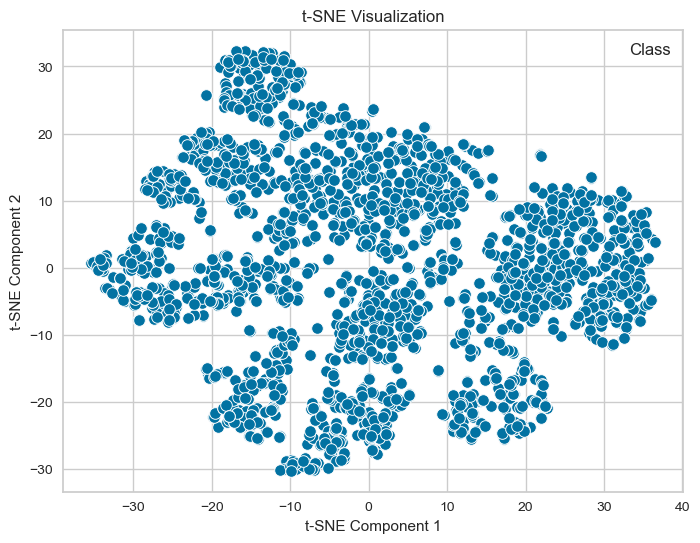

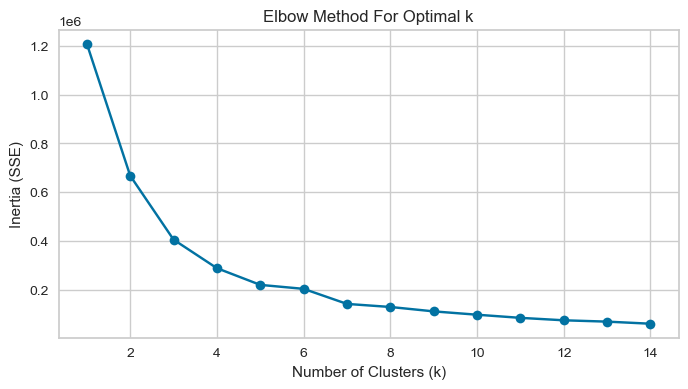

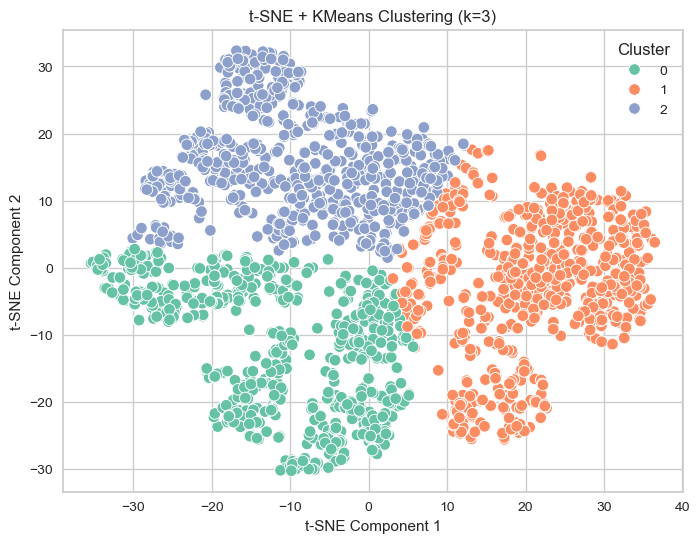

In [40]:

# Convert to DataFrame for easy plotting
df_tsne = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])

# Plot t-SNE visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_tsne, x='TSNE1', y='TSNE2', palette='Set1', s=70)
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Class')
plt.grid(True)
plt.show()

# Step 2: Elbow method to find optimal number of clusters
inertia = []
k_range = range(1, 15)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_tsne)
    inertia.append(kmeans.inertia_)


# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# Step 3: Fit KMeans with optimal number of clusters (choose k from elbow plot, say 3)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(X_tsne)

# Step 4: Scatter plot of t-SNE results with KMeans cluster coloring
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=labels, palette='Set2', s=70)
plt.title(f't-SNE + KMeans Clustering (k={optimal_k})')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# PCA

Explained variance ratio: [0.36694951 0.1146436 ]
Total explained variance: 0.481593108247403


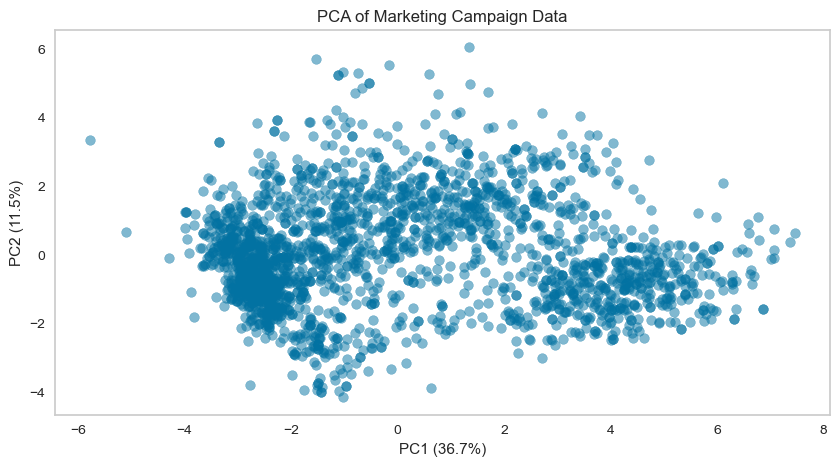

In [42]:
# Perform PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_df)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, 
                      columns=['PC1', 'PC2'])

# Explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")
print(f"Total explained variance: {sum(pca.explained_variance_ratio_)}")


# Plot the PCA results
plt.figure(figsize=(10, 5))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA of Marketing Campaign Data')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]*100:.1f}%)')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]*100:.1f}%)')
plt.grid()
plt.show()

# K-means

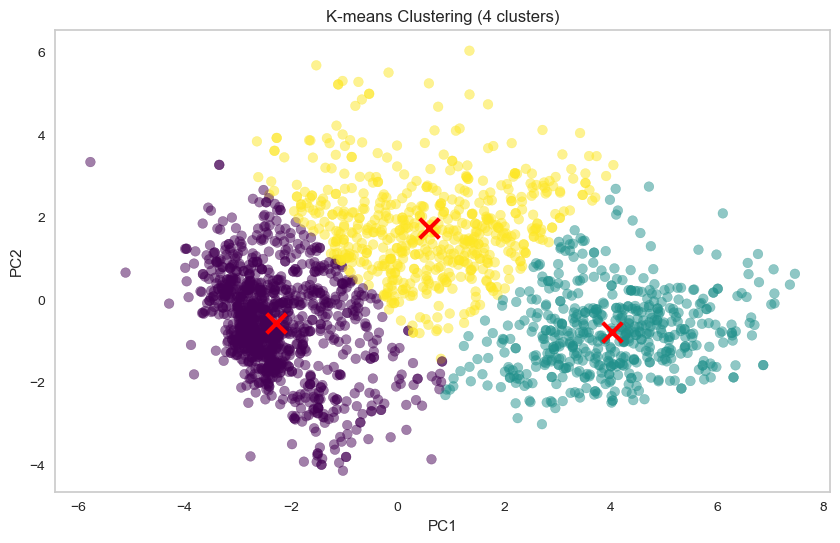

In [44]:

# Based on the elbow plot, let's choose 4 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_df)

# Plot K-means clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', s=200, linewidths=3, color='red')
plt.title('K-means Clustering (4 clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


# Agglomerative Clustering

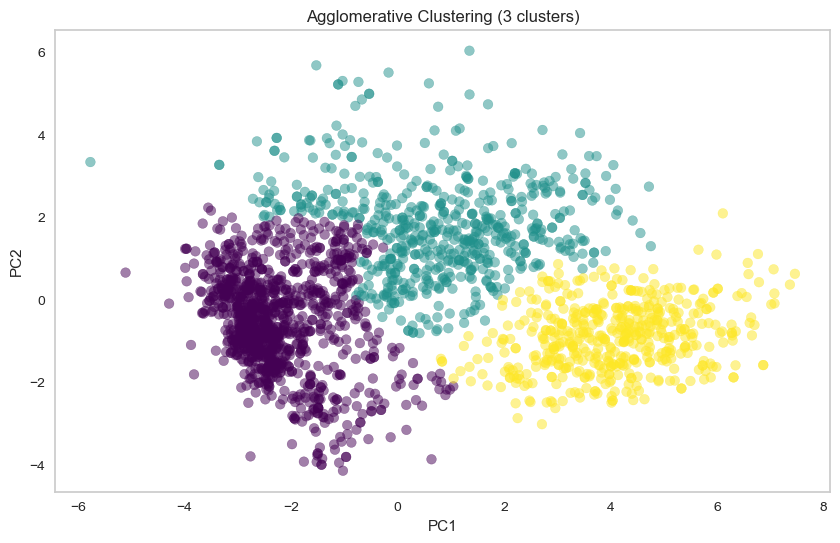

In [46]:
# Perform Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(pca_df)

# Plot Agglomerative clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=agg_labels, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering (3 clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


In [47]:
# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_df)

# Number of clusters (excluding noise points)
n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
print(f"DBSCAN found {n_clusters} clusters")



DBSCAN found 3 clusters


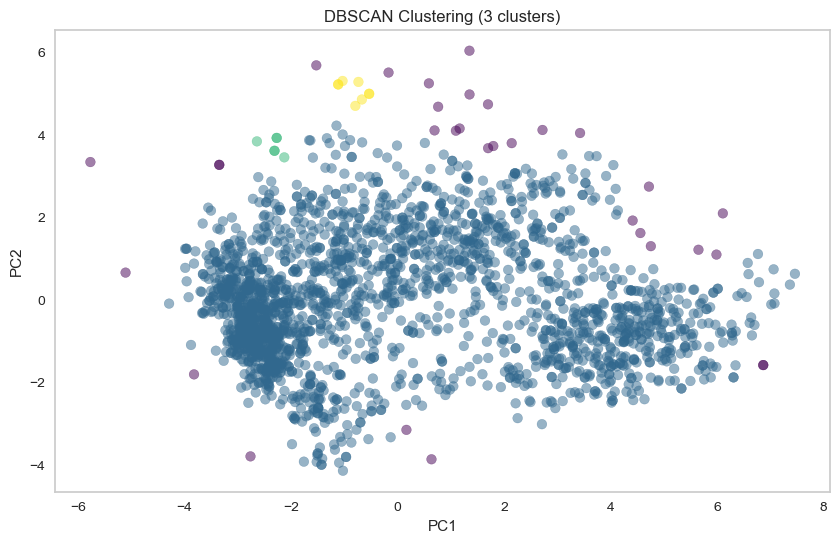

In [48]:
# Plot DBSCAN clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=dbscan_labels, cmap='viridis', alpha=0.5)
plt.title(f'DBSCAN Clustering ({n_clusters} clusters)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.grid()
plt.show()


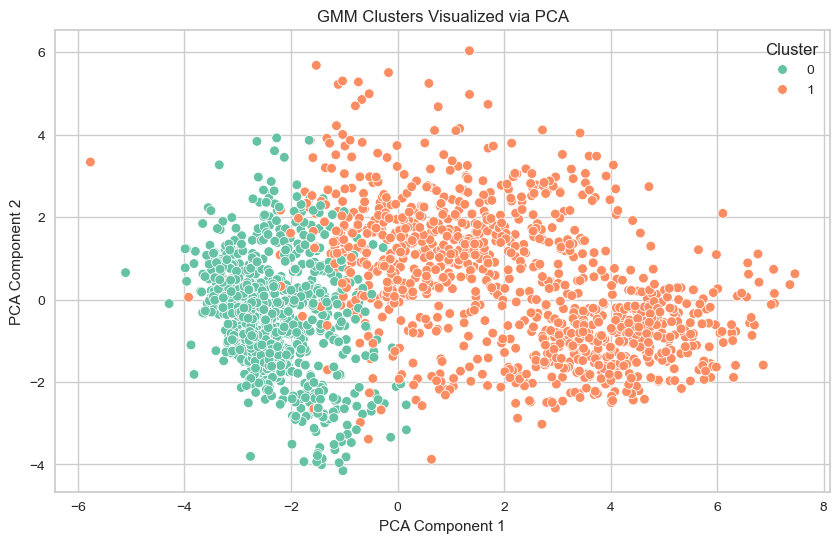

In [49]:
# 5. GMM Clustering
gmm = GaussianMixture(n_components=2, random_state=42)
clusters = gmm.fit_predict(scaled_df)

# Add cluster labels to the original dataframe
df['Cluster'] = clusters

# 6. Visualize using PCA
Gpca = PCA(n_components=2)
Gpca_data = Gpca.fit_transform(scaled_df)
df['PCA1'] = Gpca_data[:, 0]
df['PCA2'] = Gpca_data[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("GMM Clusters Visualized via PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


# Model Evaluation Comparison

In [51]:

# Model Evaluation Comparison

print("Model Performance Comparison (Silhouette Score):")
print(f"t-SNE + KMeans: {silhouette_score(X_tsne, labels):.2f}")
print(f"PCA + KMeans: {silhouette_score(pca_df, kmeans_labels):.2f}")
print(f"Agglomerative: {silhouette_score(pca_df, agg_labels):.2f}")
if n_clusters > 1:
    valid = dbscan_labels != -1
    print(f"DBSCAN: {silhouette_score(pca_df[valid], dbscan_labels[valid]):.2f}")
else:
    print("DBSCAN: Not enough clusters for silhouette score")
print(f"GMM: {silhouette_score(scaled_df, clusters):.2f}")



Model Performance Comparison (Silhouette Score):
t-SNE + KMeans: 0.43
PCA + KMeans: 0.50
Agglomerative: 0.49
DBSCAN: 0.17
GMM: 0.23


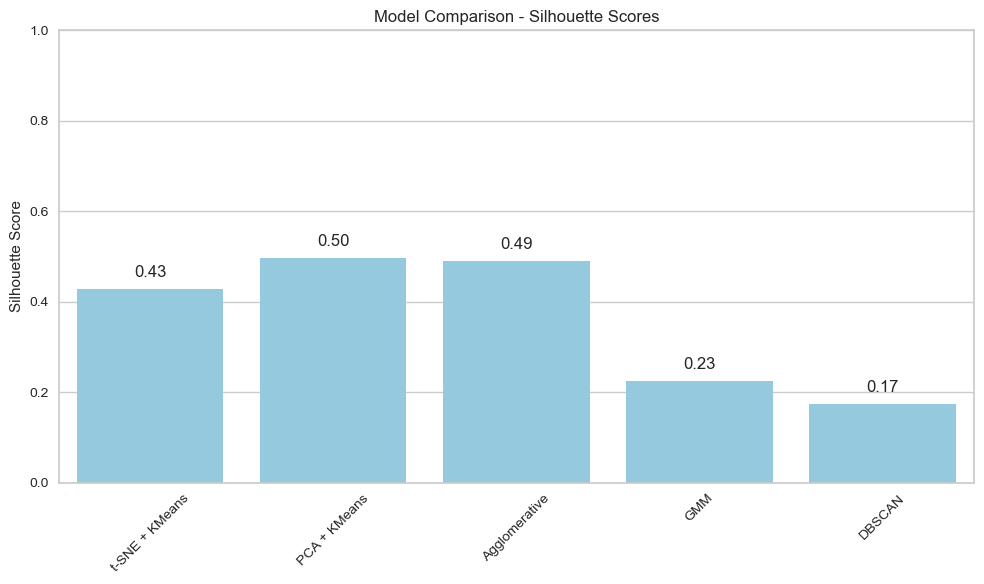

In [52]:
# Visual comparison

evaluation_results = {
    "t-SNE + KMeans": silhouette_score(X_tsne, labels),
    "PCA + KMeans": silhouette_score(pca_df, kmeans_labels),
    "Agglomerative": silhouette_score(pca_df, agg_labels),
    "GMM": silhouette_score(scaled_df, clusters),
    "DBSCAN": silhouette_score(pca_df[valid], dbscan_labels[valid]) if n_clusters > 1 else None
}

# Bar plot of silhouette scores
plt.figure(figsize=(10, 6))
scores = [score if score is not None else 0 for score in evaluation_results.values()]
colors = ['skyblue' if score is not None else 'lightgray' for score in evaluation_results.values()]
sns.barplot(x=list(evaluation_results.keys()), y=scores, palette=colors)
plt.title("Model Comparison - Silhouette Scores")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
for i, score in enumerate(scores):
    label = f"{score:.2f}" if score != 0 else "N/A"
    plt.text(i, score + 0.02, label, ha='center', va='bottom')
plt.tight_layout()
plt.show()


In [53]:
# 1. Append cluster labels to both dataframes
df['Cluster'] = kmeans_labels
scaled_df['Cluster'] = kmeans_labels


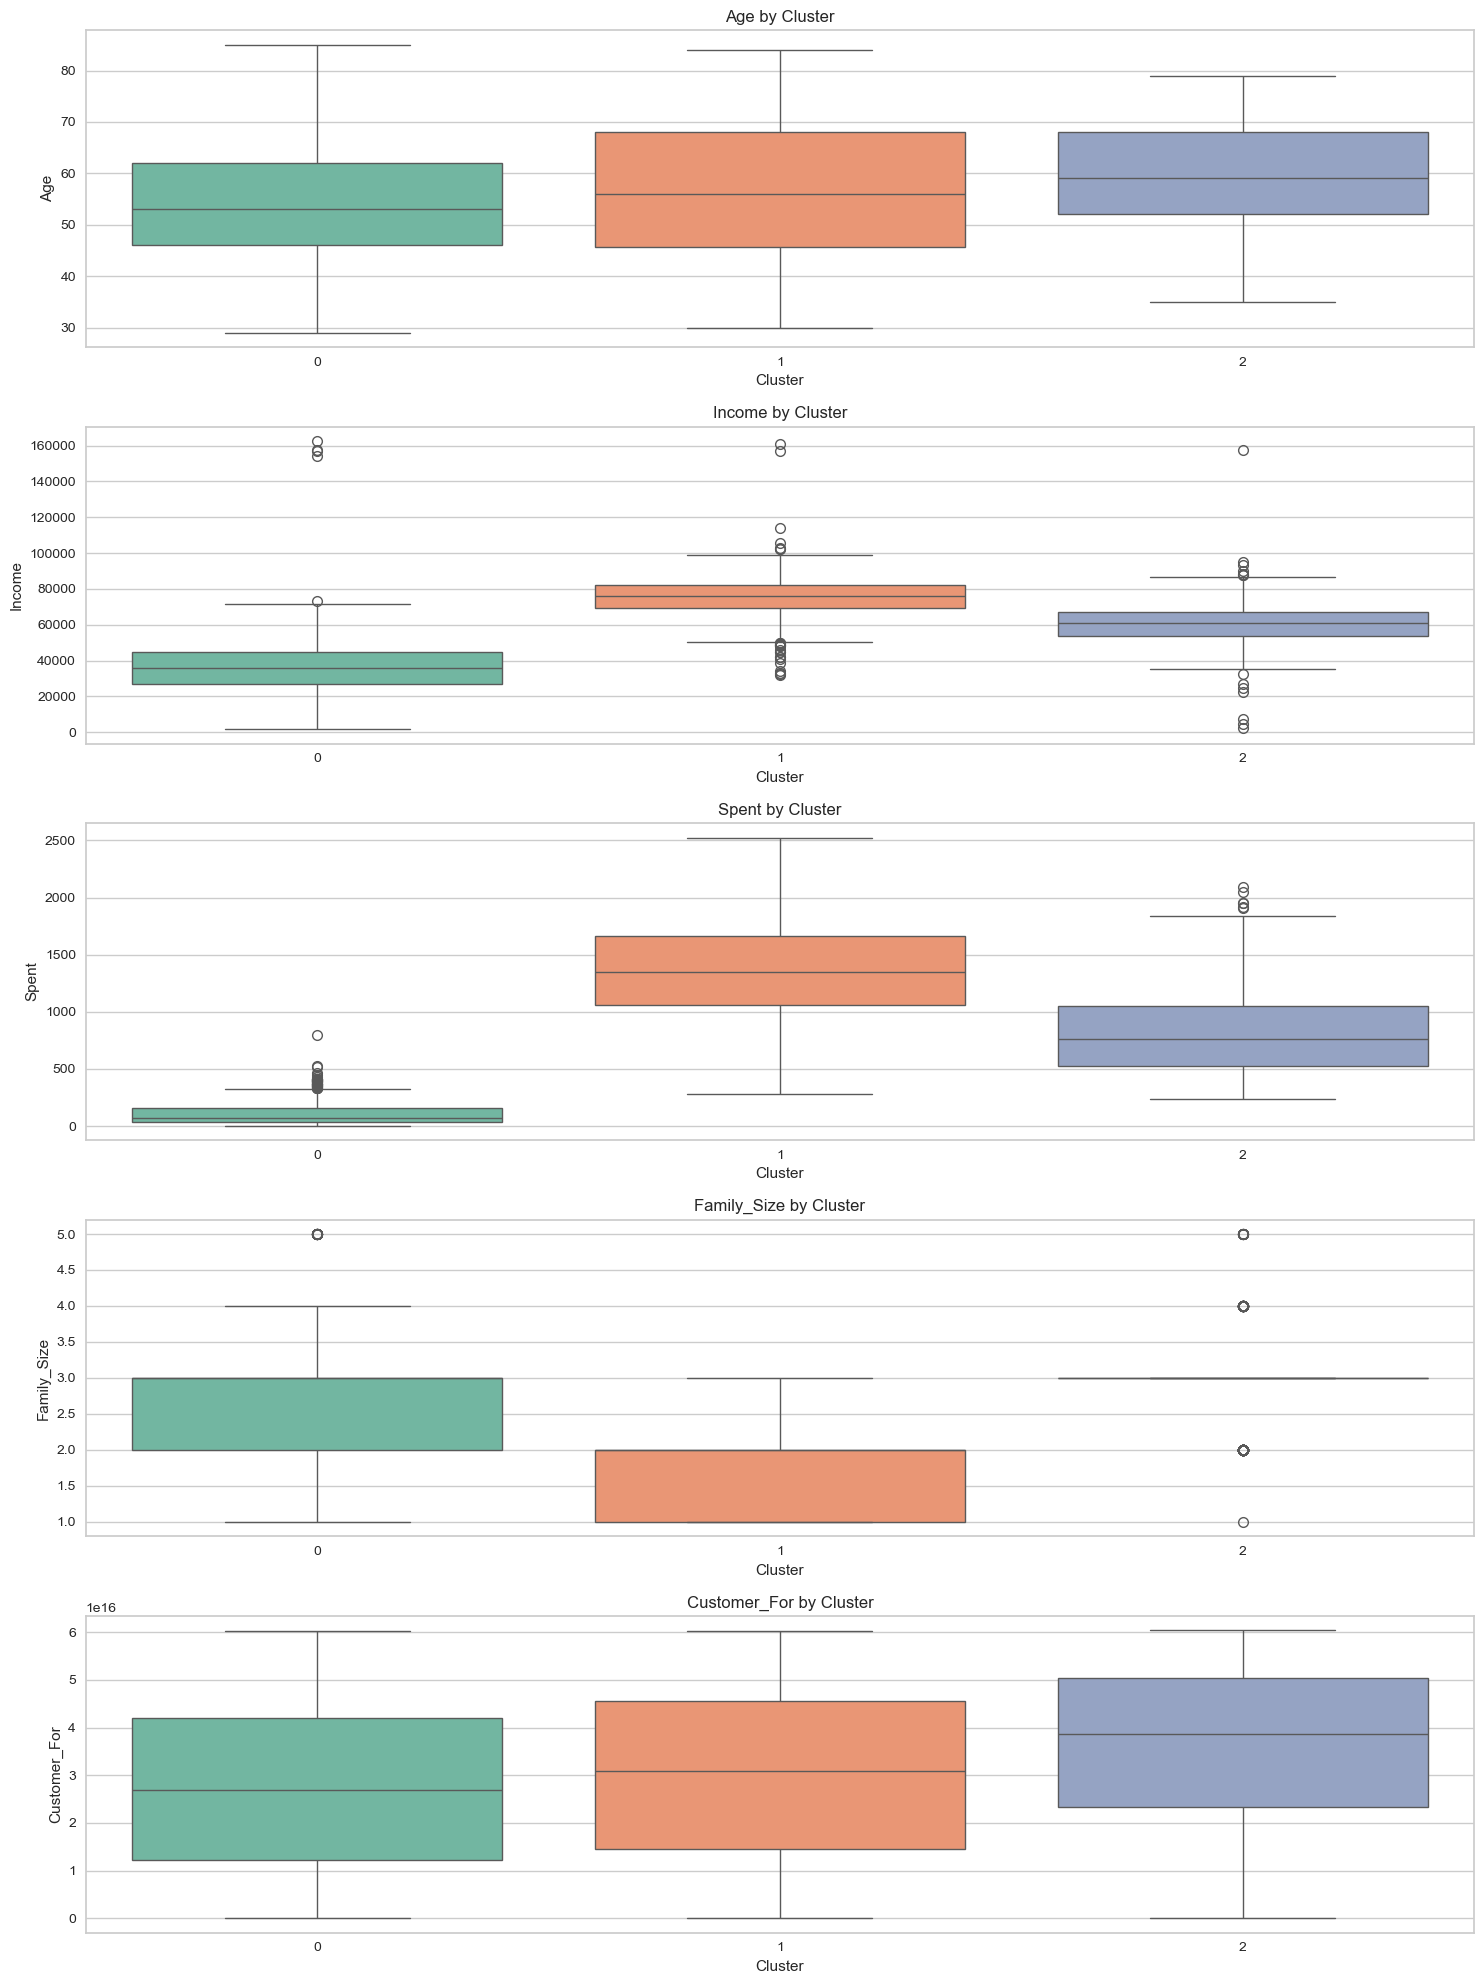

In [54]:
numeric_features = ['Age', 'Income', 'Spent', 'Family_Size', 'Customer_For']

plt.figure(figsize=(15, len(numeric_features)*4))
for i, feat in enumerate(numeric_features, 1):
    plt.subplot(len(numeric_features), 1, i)
    sns.boxplot(x='Cluster', y=feat, data=df, palette='Set2')
    plt.title(f'{feat} by Cluster')
    plt.tight_layout()
plt.show()


Is_Parent → color
   0 (Non-Parent) → #66c2a5
   1 (Parent) → #fc8d62


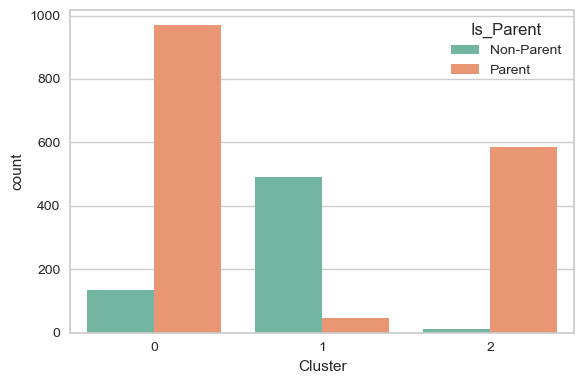


Living_status → color
   0 (Alone) → #66c2a5
   1 (With Family) → #fc8d62


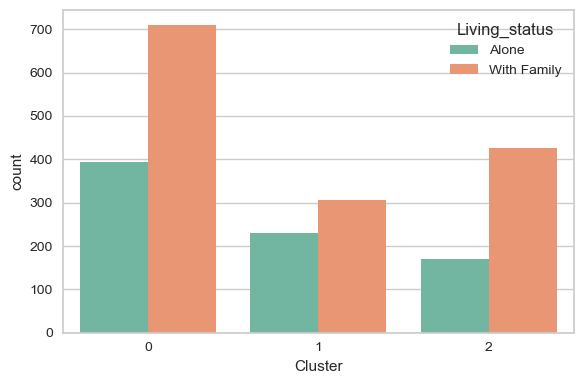

In [55]:



# 1. Define your two categories for Is_Parent
parent_levels = [0, 1]    # 0 = Non-Parent, 1 = Parent

# 2. Pick two colors from a seaborn palette
base_colors_parent = sns.color_palette('Set2', n_colors=2)

# 3. Build dict mapping each level → hex
parent_palette = {
    lvl: to_hex(col)
    for lvl, col in zip(parent_levels, base_colors_parent)
}

# 4. Print mapping
print("Is_Parent → color")
for lvl, col in parent_palette.items():
    label = 'Non-Parent' if lvl == 0 else 'Parent'
    print(f"   {lvl} ({label}) → {col}")

# 5. Plot
plt.figure(figsize=(6,4))
sns.countplot(
    x='Cluster',
    hue='Is_Parent',
    data=df,
    palette=parent_palette
)
plt.legend(title='Is_Parent', labels=['Non-Parent','Parent'])
plt.tight_layout()
plt.show()



# Now do the same for Living_status

# If Living_status is numeric 0/1:
living_levels = [0, 1]    # 0 = Alone, 1 = With Family
base_colors_living = sns.color_palette('Set2', n_colors=2)
living_palette = {
    lvl: to_hex(col)
    for lvl, col in zip(living_levels, base_colors_living)
}

print("\nLiving_status → color")
for lvl, col in living_palette.items():
    label = 'Alone' if lvl == 0 else 'With Family'
    print(f"   {lvl} ({label}) → {col}")

plt.figure(figsize=(6,4))
sns.countplot(
    x='Cluster',
    hue='Living_status',
    data=df,
    palette=living_palette
)
plt.legend(title='Living_status', labels=['Alone','With Family'])
plt.tight_layout()
plt.show()


# Cluster 0 

low income and spending, 
Balanced family sizes,
mostly paired and parented,
customer for short time

# Cluster 1

high income and spending,
Balanced family sizes,
not parent at most,
customer for modrate time

# Cluster 2

modrate income and spending,
high family sizes,
mostly parent,
customer for long time

In [57]:
spend_cols = ['Wines', 'Fruits', 'Meat', 'Fish','Sweets', 'Gold']



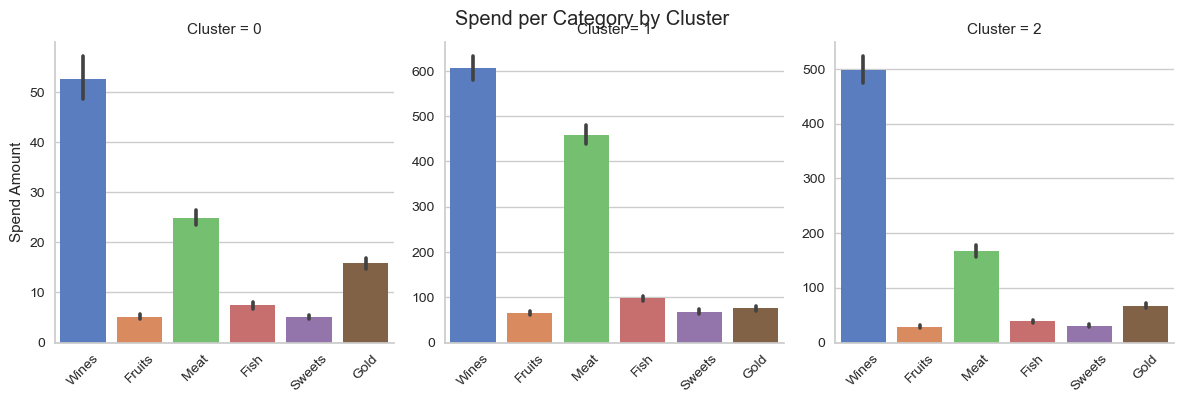

In [58]:

# Melt DataFrame for FacetGrid
melted = df.melt(
    id_vars="Cluster",
    value_vars=spend_cols,
    var_name="Category",
    value_name="Spend"
)

g = sns.FacetGrid(
    melted,
    col="Cluster",
    col_wrap=3,
    sharey=False,
    height=4
)
g.map_dataframe(
    sns.barplot,
    x="Category",
    y="Spend",
    palette="muted",
    order=spend_cols
)
g.set_xticklabels(rotation=45)
g.set_axis_labels("", "Spend Amount")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Spend per Category by Cluster")
plt.show()


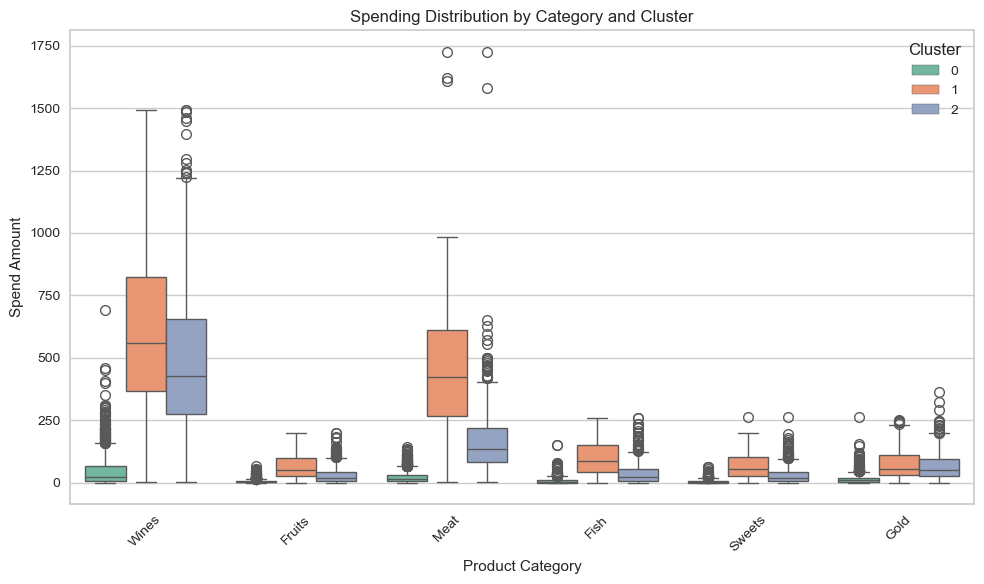

In [59]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=melted,
    x="Category",
    y="Spend",
    hue="Cluster",
    palette="Set2"
)
plt.title("Spending Distribution by Category and Cluster")
plt.xlabel("Product Category")
plt.ylabel("Spend Amount")
plt.xticks(rotation=45)
plt.legend(title="Cluster")
plt.tight_layout()
plt.show()


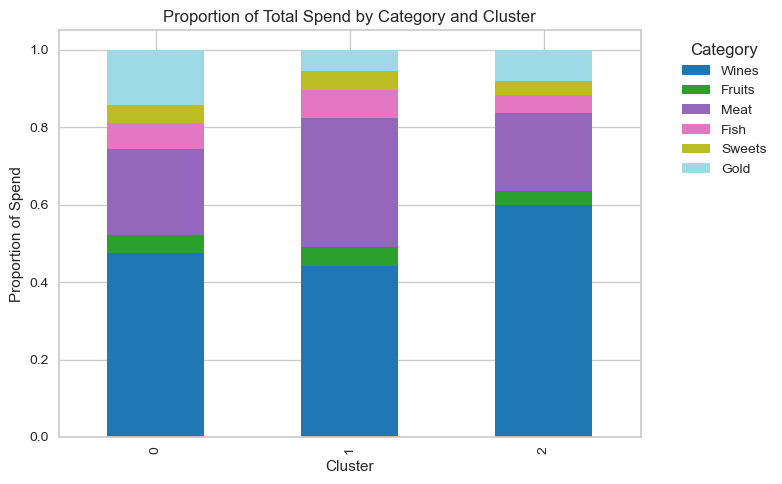

In [60]:
# Total spend per cluster
cluster_tot = df.groupby("Cluster")[spend_cols].sum()

# Normalize to proportions
cluster_prop = cluster_tot.div(cluster_tot.sum(axis=1), axis=0)

cluster_prop.plot(
    kind="bar",
    stacked=True,
    figsize=(8, 5),
    colormap="tab20"
)
plt.title("Proportion of Total Spend by Category and Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Spend")
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="Category"
)
plt.tight_layout()
plt.show()


In [63]:
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

with open("kmeans.pkl", "wb") as f:
    pickle.dump(kmeans, f)
